# Predicting the Doctor's Consultation fees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
sns.set()

In [2]:
#Splliting library
from sklearn.model_selection import train_test_split

#importing model library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 

#importing ensemble techniques
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor, GradientBoostingRegressor

#importing testing parameters
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [3]:
df = pd.read_excel('Final_Train.xlsx')

In [4]:
df.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [5]:
df.shape

(5961, 7)

In [6]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

# Working with Rating

In [7]:
df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [8]:
df['Rating'] = df['Rating'].str[0:-1]
df['Rating']=df['Rating'].astype(float)
df['Rating'].unique()

array([100.,  98.,  nan,  99.,  79.,  95.,  97.,  94.,  88.,  90.,  80.,
        93.,  36.,  78.,  87.,  96.,  82.,  89.,  74.,  86.,  92.,  83.,
        76.,  85.,  56.,  91.,  68.,  60.,  75.,  69.,  73.,  67.,  77.,
        33.,  55.,  71.,  84.,  45.,  63.,  72.,  81.,  62.,  57.,   7.,
        48.,  40.,  70.,  64.,  65.,  47.,  58.,  53.])

In [9]:
#top 10 most frequent rating
df['Rating'].value_counts().head(10)

100.0    684
98.0     290
99.0     259
97.0     241
96.0     220
95.0     178
94.0     115
93.0     109
92.0      66
90.0      66
Name: Rating, dtype: int64

In [10]:
t10_rating =df['Rating'].value_counts().head(10).index

In [11]:
#Replacing the nan value with the 10 most frequent values (Random inputation)
df['Rating']=np.where(df['Rating'].isnull(), random.choice(t10_rating), df['Rating'] )

In [12]:
df['Rating'].unique()

array([100.,  98.,  93.,  99.,  79.,  95.,  97.,  94.,  88.,  90.,  80.,
        36.,  78.,  87.,  96.,  82.,  89.,  74.,  86.,  92.,  83.,  76.,
        85.,  56.,  91.,  68.,  60.,  75.,  69.,  73.,  67.,  77.,  33.,
        55.,  71.,  84.,  45.,  63.,  72.,  81.,  62.,  57.,   7.,  48.,
        40.,  70.,  64.,  65.,  47.,  58.,  53.])

#### There are no null values in rating features

In [13]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

# Working with Place

In [14]:
#Looking for the null values in the Place
df[df['Place'].isnull()]

Qualification           Experience  \
91    Get inspired by remarkable stories of people l...   0 years experience   
502   Get inspired by remarkable stories of people l...   0 years experience   
599   Get inspired by remarkable stories of people l...   0 years experience   
605   Get inspired by remarkable stories of people l...   0 years experience   
724   Get inspired by remarkable stories of people l...   0 years experience   
1002  Get inspired by remarkable stories of people l...   0 years experience   
1083  Get inspired by remarkable stories of people l...   0 years experience   
1210  Get inspired by remarkable stories of people l...   0 years experience   
2078  Get inspired by remarkable stories of people l...   0 years experience   
2178  Get inspired by remarkable stories of people l...   0 years experience   
2328  Get inspired by remarkable stories of people l...   0 years experience   
3099  Get inspired by remarkable stories of people l...   0 years experience   
3228  Get inspired by remarkable stories of people l...   0 years experience   
3418  Get inspired by remarkable stories of people l...   0 years experience   
3443  Get inspired by remarkable stories of people l...   0 years experience   
3744  Get inspired by remarkable stories of people l...   0 years experience   
3804  Get inspired by remarkable stories of people l...   0 years experience   
4004  Get inspired by remarkable stories of people l...   0 years experience   
4758  Get inspired by remarkable stories of people l...   0 years experience   
4823                                         MBBS, DDVL  22 years experience   
4847  Get inspired by remarkable stories of people l...   0 years experience   
5058  Get inspired by remarkable stories of people l...   0 years experience   
5187  Get inspired by remarkable stories of people l...   0 years experience   
5551  Get inspired by remarkable stories of people l...   0 years experience   
5723  Get inspired by remarkable stories of people l...   0 years experience   

      Rating Place         Profile Miscellaneous_Info  Fees  
91      93.0   NaN  Dermatologists                NaN   100  
502     93.0   NaN  Dermatologists                NaN   100  
599     93.0   NaN  Dermatologists                NaN   100  
605     93.0   NaN  Dermatologists                NaN   100  
724     93.0   NaN  Dermatologists                NaN   100  
1002    93.0   NaN  Dermatologists                NaN   100  
1083    93.0   NaN  Dermatologists                NaN   100  
1210    93.0   NaN  Dermatologists                NaN   100  
2078    93.0   NaN  Dermatologists                NaN   100  
2178    93.0   NaN  Dermatologists                NaN   100  
2328    93.0   NaN  Dermatologists                NaN   100  
3099    93.0   NaN  Dermatologists                NaN   100  
3228    93.0   NaN  Dermatologists                NaN   100  
3418    93.0   NaN  Dermatologists                NaN   100  
3443    93.0   NaN  Dermatologists                NaN   100  
3744    93.0   NaN  Dermatologists                NaN   100  
3804    93.0   NaN  Dermatologists                NaN   100  
4004    93.0   NaN  Dermatologists                NaN   100  
4758    93.0   NaN  Dermatologists                NaN   100  
4823    93.0   NaN  Dermatologists                NaN   150  
4847    93.0   NaN  Dermatologists                NaN   100  
5058    93.0   NaN  Dermatologists                NaN   100  
5187    93.0   NaN  Dermatologists                NaN   100  
5551    93.0   NaN  Dermatologists                NaN   100  
5723    93.0   NaN  Dermatologists                NaN   100

#### Observation: There is no usefull data in the rows that have NAN as place value, Dropping these rows

In [15]:
temp = df[df['Place'].isnull()].index
df.drop(index=temp, inplace = True)
df.reset_index(inplace = True)
df.tail()

index                Qualification           Experience  Rating  \
5931   5956               MBBS, MS - ENT  19 years experience    98.0   
5932   5957                         MBBS  33 years experience    93.0   
5933   5958                         MBBS  41 years experience    97.0   
5934   5959  MBBS, MD - General Medicine  15 years experience    90.0   
5935   5960      BDS, MDS - Orthodontics  17 years experience   100.0   

                              Place           Profile  \
5931        Basavanagudi, Bangalore    ENT Specialist   
5932          Nungambakkam, Chennai  General Medicine   
5933  Greater Kailash Part 2, Delhi  General Medicine   
5934         Vileparle West, Mumbai  General Medicine   
5935               Pitampura, Delhi           Dentist   

                                     Miscellaneous_Info  Fees  
5931            98% 45 Feedback Basavanagudi, Bangalore   300  
5932                                                NaN   100  
5933      97% 11 Feedback Greater Kailash Part 2, Delhi   600  
5934  General Medical Consultation Viral Fever Treat...   100  
5935  Acrylic Partial Denture Crowns and Bridges Fix...   200

In [16]:
df.drop('index', axis =1, inplace = True)

In [17]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2595
Fees                     0
dtype: int64

## Working with Experience Feature

In [18]:
#Checking for null values
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years experience',
       '17 y

In [19]:
df['Experience'] = df['Experience'].str[0:2].astype(int)

In [20]:
df['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33, 27, 30, 52, 60, 26,
       35, 34, 39, 32, 17,  0, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

# Working with Place - Dividing it into locality and city

In [21]:
temp = pd.DataFrame(df['Place'].str.split(',',1).tolist(),columns = ['Locality','City'])
df=pd.concat([temp,df],axis=1)

In [22]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram',
       ' Sector 5, Delhi', None], dtype=object)

In [23]:
#replacing sector 5 delhi with Deli
df['City'].replace(' Sector 5, Delhi', ' Delhi',inplace=True )

In [24]:
df.drop('Place', axis =1, inplace = True)
df.isnull().sum()

Locality                 0
City                     1
Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2595
Fees                     0
dtype: int64

In [25]:
df[df.City.isnull()]

Locality  City Qualification  Experience  Rating  Profile  \
3963        e  None           BDS          23    93.0  Dentist   

     Miscellaneous_Info  Fees  
3963                NaN   250

In [26]:
#mode of city feature ----> Bangalore
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Name: City, dtype: int64

In [27]:
#mode of locality feature in Bangalore:
df.groupby('City').get_group(' Bangalore')['Locality'].value_counts().index

Index(['HSR Layout', 'Indiranagar', 'Whitefield', 'Malleswaram',
       'Marathahalli', 'Bannerghatta Road', 'Koramangala', 'Yelahanka',
       'Rajajinagar', 'Bellandur',
       ...
       'HAL', 'JP Nagar 4 Phase', 'Koramangala 8 Block', 'Siddapura',
       'Austin Town', 'Nayandahalli', 'Hennur', 'Ullal Upanagara',
       'Hegde Nagar', 'Hebbal Kempapura'],
      dtype='object', length=153)

In [28]:

df.at[3963,'Locality' ]= 'HSR Layout'
df.at[3963,'City' ]= ' Bangalore'

In [29]:
df.isnull().sum()

Locality                 0
City                     0
Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2595
Fees                     0
dtype: int64

# Working with Misleneous information

#### There are almost 40% null values with data being not usefull. The data can either be dropped or the missing info can be turned into a binary feature to determine the significance of the missing value. Going with second option.

In [30]:
mi = df['Miscellaneous_Info']
df.drop('Miscellaneous_Info', axis =1, inplace = True)
mi = np.where(mi.isnull(),0,1) 
df['mi']=mi

In [31]:
df.isnull().sum()

Locality         0
City             0
Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
mi               0
dtype: int64

#### The dataframe is now free from all null values

In [32]:
df.head()

Locality        City                   Qualification  Experience  \
0           Kakkanad   Ernakulam           BHMS, MD - Homeopathy          24   
1         Whitefield   Bangalore    BAMS, MD - Ayurveda Medicine          12   
2    Mathikere - BEL   Bangalore  MBBS, MS - Otorhinolaryngology           9   
3  Bannerghatta Road   Bangalore             BSc - Zoology, BAMS          12   
4       Keelkattalai     Chennai                            BAMS          20   

   Rating         Profile  Fees  mi  
0   100.0       Homeopath   100   1  
1    98.0        Ayurveda   350   1  
2    93.0  ENT Specialist   300   0  
3    93.0        Ayurveda   250   1  
4   100.0        Ayurveda   250   1

In [33]:
#Working with Qualification
df.nunique()

Locality          865
City                8
Qualification    1419
Experience         64
Rating             51
Profile             6
Fees               40
mi                  2
dtype: int64

##### The common qualification can be taken as MBBS, MD, MS, BDS, BAMS,BHMS, etc (upper case letters). That can be with certain specialization that are lower case letters.
This can be done using regular expression argument from NLP

In [34]:
df['Qualification']

0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5931                    MBBS, MS - ENT
5932                              MBBS
5933                              MBBS
5934       MBBS, MD - General Medicine
5935           BDS, MDS - Orthodontics
Name: Qualification, Length: 5936, dtype: object

In [35]:
from nltk.tokenize import regexp_tokenize as rt

In [36]:
for i in range(df.shape[0]):
    temp = ''  
    t = rt(df.iloc[i]['Qualification'], "[A-Z]+")
    
    for l in range(len(t)):
        if (t[l] == 'MD') or (t[l] == 'MS'):
            temp = temp + ',' +  t[l]
        elif t[l] == 'ENT':
            pass
        elif len(t[l]) >=3:
            temp =  temp + ',' + t[l]
        else:
            pass
            
    df.loc[i,'Q'] = temp

In [37]:
#Removing the comma from df[Q]
for i in range(df.shape[0]):
    df.loc[i,'Q'] = df.loc[i]['Q'][1:]

In [38]:
df.head(10)

Locality        City                   Qualification  Experience  \
0           Kakkanad   Ernakulam           BHMS, MD - Homeopathy          24   
1         Whitefield   Bangalore    BAMS, MD - Ayurveda Medicine          12   
2    Mathikere - BEL   Bangalore  MBBS, MS - Otorhinolaryngology           9   
3  Bannerghatta Road   Bangalore             BSc - Zoology, BAMS          12   
4       Keelkattalai     Chennai                            BAMS          20   
5              Porur     Chennai                            BAMS           8   
6         Karol Bagh       Delhi                            BHMS          42   
7            Arekere   Bangalore                             BDS          10   
8           Old City   Hyderabad     MBBS, MD - General Medicine          14   
9             Athani   Ernakulam                        BSc, BDS          23   

   Rating           Profile  Fees  mi        Q  
0   100.0         Homeopath   100   1  BHMS,MD  
1    98.0          Ayurveda   350   1  BAMS,MD  
2    93.0    ENT Specialist   300   0  MBBS,MS  
3    93.0          Ayurveda   250   1     BAMS  
4   100.0          Ayurveda   250   1     BAMS  
5    93.0          Ayurveda   100   0     BAMS  
6    93.0         Homeopath   200   0     BHMS  
7    99.0           Dentist   200   1      BDS  
8    93.0  General Medicine   100   0  MBBS,MD  
9    93.0           Dentist   100   0      BDS

In [39]:
df.drop('Qualification', axis = 1, inplace = True)

In [40]:
df.rename(columns = {'Q':'Qualification'}, inplace = True)

In [41]:
df.head(10)

Locality        City  Experience  Rating           Profile  Fees  \
0           Kakkanad   Ernakulam          24   100.0         Homeopath   100   
1         Whitefield   Bangalore          12    98.0          Ayurveda   350   
2    Mathikere - BEL   Bangalore           9    93.0    ENT Specialist   300   
3  Bannerghatta Road   Bangalore          12    93.0          Ayurveda   250   
4       Keelkattalai     Chennai          20   100.0          Ayurveda   250   
5              Porur     Chennai           8    93.0          Ayurveda   100   
6         Karol Bagh       Delhi          42    93.0         Homeopath   200   
7            Arekere   Bangalore          10    99.0           Dentist   200   
8           Old City   Hyderabad          14    93.0  General Medicine   100   
9             Athani   Ernakulam          23    93.0           Dentist   100   

   mi Qualification  
0   1       BHMS,MD  
1   1       BAMS,MD  
2   0       MBBS,MS  
3   1          BAMS  
4   1          BAMS  
5   0          BAMS  
6   0          BHMS  
7   1           BDS  
8   0       MBBS,MD  
9   0           BDS

In [42]:
#Seprating Qualification in terms of number of degrees
for i in range(df.shape[0]):
    t = df.loc[i,'Qualification'].split(",")
    df.loc[i,'QL'] =len(t)

In [43]:
df.head()

Locality        City  Experience  Rating         Profile  Fees  \
0           Kakkanad   Ernakulam          24   100.0       Homeopath   100   
1         Whitefield   Bangalore          12    98.0        Ayurveda   350   
2    Mathikere - BEL   Bangalore           9    93.0  ENT Specialist   300   
3  Bannerghatta Road   Bangalore          12    93.0        Ayurveda   250   
4       Keelkattalai     Chennai          20   100.0        Ayurveda   250   

   mi Qualification   QL  
0   1       BHMS,MD  2.0  
1   1       BAMS,MD  2.0  
2   0       MBBS,MS  2.0  
3   1          BAMS  1.0  
4   1          BAMS  1.0

In [44]:
df[df['QL'] > 4].sort_values(by = 'Fees', ascending = False)

Locality         City  Experience  Rating  \
2815            Mulund West       Mumbai          15    93.0   
1411           Nungambakkam      Chennai          17    93.0   
2956       Old Airport Road    Bangalore          23    95.0   
5136            Lingampally    Hyderabad          22    99.0   
5176            Gopalapuram      Chennai          41    93.0   
2606          Subhash Nagar        Delhi          13   100.0   
3547  Coimbatore Racecourse   Coimbatore           5    93.0   
3074             Anna Nagar      Chennai          35    91.0   
4164             Gachibowli    Hyderabad          16    87.0   
5497         Kandivali East       Mumbai          19    81.0   
1242              Jayanagar    Bangalore          32    90.0   
1548            Indiranagar    Bangalore          21    93.0   
2109              Jayanagar    Bangalore          38    85.0   
4892          Banjara Hills    Hyderabad          14    99.0   
5627             Malad West       Mumbai          16   100.0   
4518           Vasant Vihar        Delhi          14    99.0   
58              Kodambakkam      Chennai          24    93.0   
5483           Yeshwanthpur    Bangalore          25    95.0   
1461               Nandanam      Chennai          26    93.0   
4637             Karol Bagh        Delhi          14    93.0   
3538       JP Nagar 7 Phase    Bangalore          23    94.0   
5906          Richards Town    Bangalore          13    99.0   
5207            Vasant Kunj        Delhi           8    93.0   
5643             Punjagutta    Hyderabad          13    93.0   
3358              Yelahanka    Bangalore          12    97.0   
1085           Nungambakkam      Chennai          22    99.0   
5461         Valasaravakkam      Chennai          18    93.0   
5249         Dilshad Garden        Delhi          13    93.0   
4046       Electronics City    Bangalore          11    93.0   
1519           Marathahalli    Bangalore          24    98.0   
4460             Moti Nagar    Hyderabad          15    71.0   
4027           Kemps Corner       Mumbai          13    93.0   
1601           Andheri East       Mumbai          13    93.0   
1876                 Colaba       Mumbai          22    91.0   
2833             Dadar East       Mumbai          27    98.0   
3176            Vasant Kunj        Delhi          42    96.0   
917          Saravanampatti   Coimbatore          11   100.0   
5197            Bandra West       Mumbai          22    99.0   
1387           Bhandup East       Mumbai          10    93.0   

               Profile  Fees  mi                          Qualification   QL  
2815    ENT Specialist   800   0                   MBBS,MS,DNB,DLO,FCPS  5.0  
1411  General Medicine   800   1                  MBBS,MD,DNB,MRCP,FRCP  5.0  
2956  General Medicine   750   1               MBBS,MRCP,FRCP,CCST,CCST  5.0  
5136  General Medicine   700   1                 MBBS,DNB,MD,MRCPS,MRCP  5.0  
5176  General Medicine   700   0            MBBS,MD,FRCP,FACP,FRCP,FRCP  6.0  
2606    Dermatologists   700   1          MD,MBBS,DNB,MNAMS,DERMATOLOGY  5.0  
3547  General Medicine   700   0  MBBS,DFM,CCGDM,CCEDM,PGDD,ACDMC,CCMTD  7.0  
3074    ENT Specialist   650   1                   MBBS,MS,DNB,DLO,MAMS  5.0  
4164    Dermatologists   600   1                 MBBS,MRCP,CCT,ABLS,USA  5.0  
5497    ENT Specialist   600   1                   MBBS,DLO,MS,FCPS,DNB  5.0  
1242  General Medicine   600   1                     MBBS,MS,DNB,MS,DNB  5.0  
1548  General Medicine   500   1              MBBS,DNB,CCEDM,CCMTD,CCDR  5.0  
2109    ENT Specialist   500   1                  MBBS,MS,DNB,FICS,FRCS  5.0  
4892  General Medicine   500   1        MD,WHO,IDF,EASD,FCD,CCEBDM,PGDD  7.0  
5627           Dentist   500   1               FFDRCSI,MFDS,RCS,MDS,BDS  5.0  
4518           Dentist   500   1            BDS,MDS,PGCOI,ICOI,USA,PGDE  6.0  
58    General Medicine   500   1                 MBBS,MRCP,DNB,MNAMS,MD  5.0  
5483    ENT Specialist   400   1    

In [45]:
ql = set()
for i in range(df.shape[0]):
    temp = df.loc[i, 'Qualification'].split(',')
    for j in range(len(temp)):
        ql.add(temp[j])

In [46]:
tf = pd.DataFrame()
for i in ql:
    for j in range(df.shape[0]):
        tf.loc[j,i]= np.where(df.loc[j,'Qualification'].__contains__(i), 1, 0)

In [47]:
tf.head()

MOI  FIMSA  PGDMC  FDSRCS  PGDFOS  PITC  FELLOW  FRACP  MHS  ...  HOM  \
0  1.0  0.0    0.0    0.0     0.0     0.0   0.0     0.0    0.0  0.0  ...  0.0   
1  1.0  0.0    0.0    0.0     0.0     0.0   0.0     0.0    0.0  0.0  ...  0.0   
2  1.0  0.0    0.0    0.0     0.0     0.0   0.0     0.0    0.0  0.0  ...  0.0   
3  1.0  0.0    0.0    0.0     0.0     0.0   0.0     0.0    0.0  0.0  ...  0.0   
4  1.0  0.0    0.0    0.0     0.0     0.0   0.0     0.0    0.0  0.0  ...  0.0   

   LASER  BUMS  PGDPC  USA  FFDRCSI  FAN  FRCP  DORL  DDPHN  
0    0.0   0.0    0.0  0.0      0.0  0.0   0.0   0.0    0.0  
1    0.0   0.0    0.0  0.0      0.0  0.0   0.0   0.0    0.0  
2    0.0   0.0    0.0  0.0      0.0  0.0   0.0   0.0    0.0  
3    0.0   0.0    0.0  0.0      0.0  0.0   0.0   0.0    0.0  
4    0.0   0.0    0.0  0.0      0.0  0.0   0.0   0.0    0.0  

[5 rows x 212 columns]

In [48]:
tf.shape

(5936, 212)

In [49]:
tf.mean().sort_values(ascending = False).head(10).index

Index(['', 'MBBS', 'MD', 'MS', 'BDS', 'BAMS', 'MDS', 'BHMS', 'DNB', 'DDV'], dtype='object')

In [50]:
tf.drop('', axis = 1, inplace = True)

In [51]:
tf.mean().sort_values(ascending = False).head(15) #top 15 degrees

MBBS    0.472372
MD      0.389319
MS      0.365229
BDS     0.229447
BAMS    0.128369
MDS     0.128032
BHMS    0.126011
DNB     0.068565
DDV     0.048012
DLO     0.044811
DVL     0.027628
DDVL    0.026954
PGD     0.022574
PGDD    0.009434
DHMS    0.008423
dtype: float64

In [52]:
top_qualification =tf.mean().sort_values(ascending = False).head(15).index 

In [53]:
tf[top_qualification]

MBBS   MD   MS  BDS  BAMS  MDS  BHMS  DNB  DDV  DLO  DVL  DDVL  PGD  \
0      0.0  1.0  1.0  0.0   0.0  0.0   1.0  0.0  0.0  0.0  0.0   0.0  0.0   
1      0.0  1.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
2      1.0  0.0  1.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
3      0.0  0.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
4      0.0  0.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
...    ...  ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   ...  ...   
5931   1.0  0.0  1.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5932   1.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5933   1.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5934   1.0  1.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5935   0.0  1.0  0.0  1.0   0.0  1.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   

      PGDD  DHMS  
0      0.0   0.0  
1      0.0   0.0  
2      0.0   0.0  
3      0.0   0.0  
4      0.0   0.0  
...    ...   ...  
5931   0.0   0.0  
5932   0.0   0.0  
5933   0.0   0.0  
5934   0.0   0.0  
5935   0.0   0.0  

[5936 rows x 15 columns]

In [54]:
df = pd.concat([df, tf[top_qualification]], axis = 1)

# EDA

In [55]:
df.drop('Qualification', axis = 1, inplace = True)
df.head()

Locality        City  Experience  Rating         Profile  Fees  \
0           Kakkanad   Ernakulam          24   100.0       Homeopath   100   
1         Whitefield   Bangalore          12    98.0        Ayurveda   350   
2    Mathikere - BEL   Bangalore           9    93.0  ENT Specialist   300   
3  Bannerghatta Road   Bangalore          12    93.0        Ayurveda   250   
4       Keelkattalai     Chennai          20   100.0        Ayurveda   250   

   mi   QL  MBBS   MD  ...  MDS  BHMS  DNB  DDV  DLO  DVL  DDVL  PGD  PGDD  \
0   1  2.0   0.0  1.0  ...  0.0   1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1   1  2.0   0.0  1.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2   0  2.0   1.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3   1  1.0   0.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4   1  1.0   0.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   DHMS  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 23 columns]

In [56]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()    

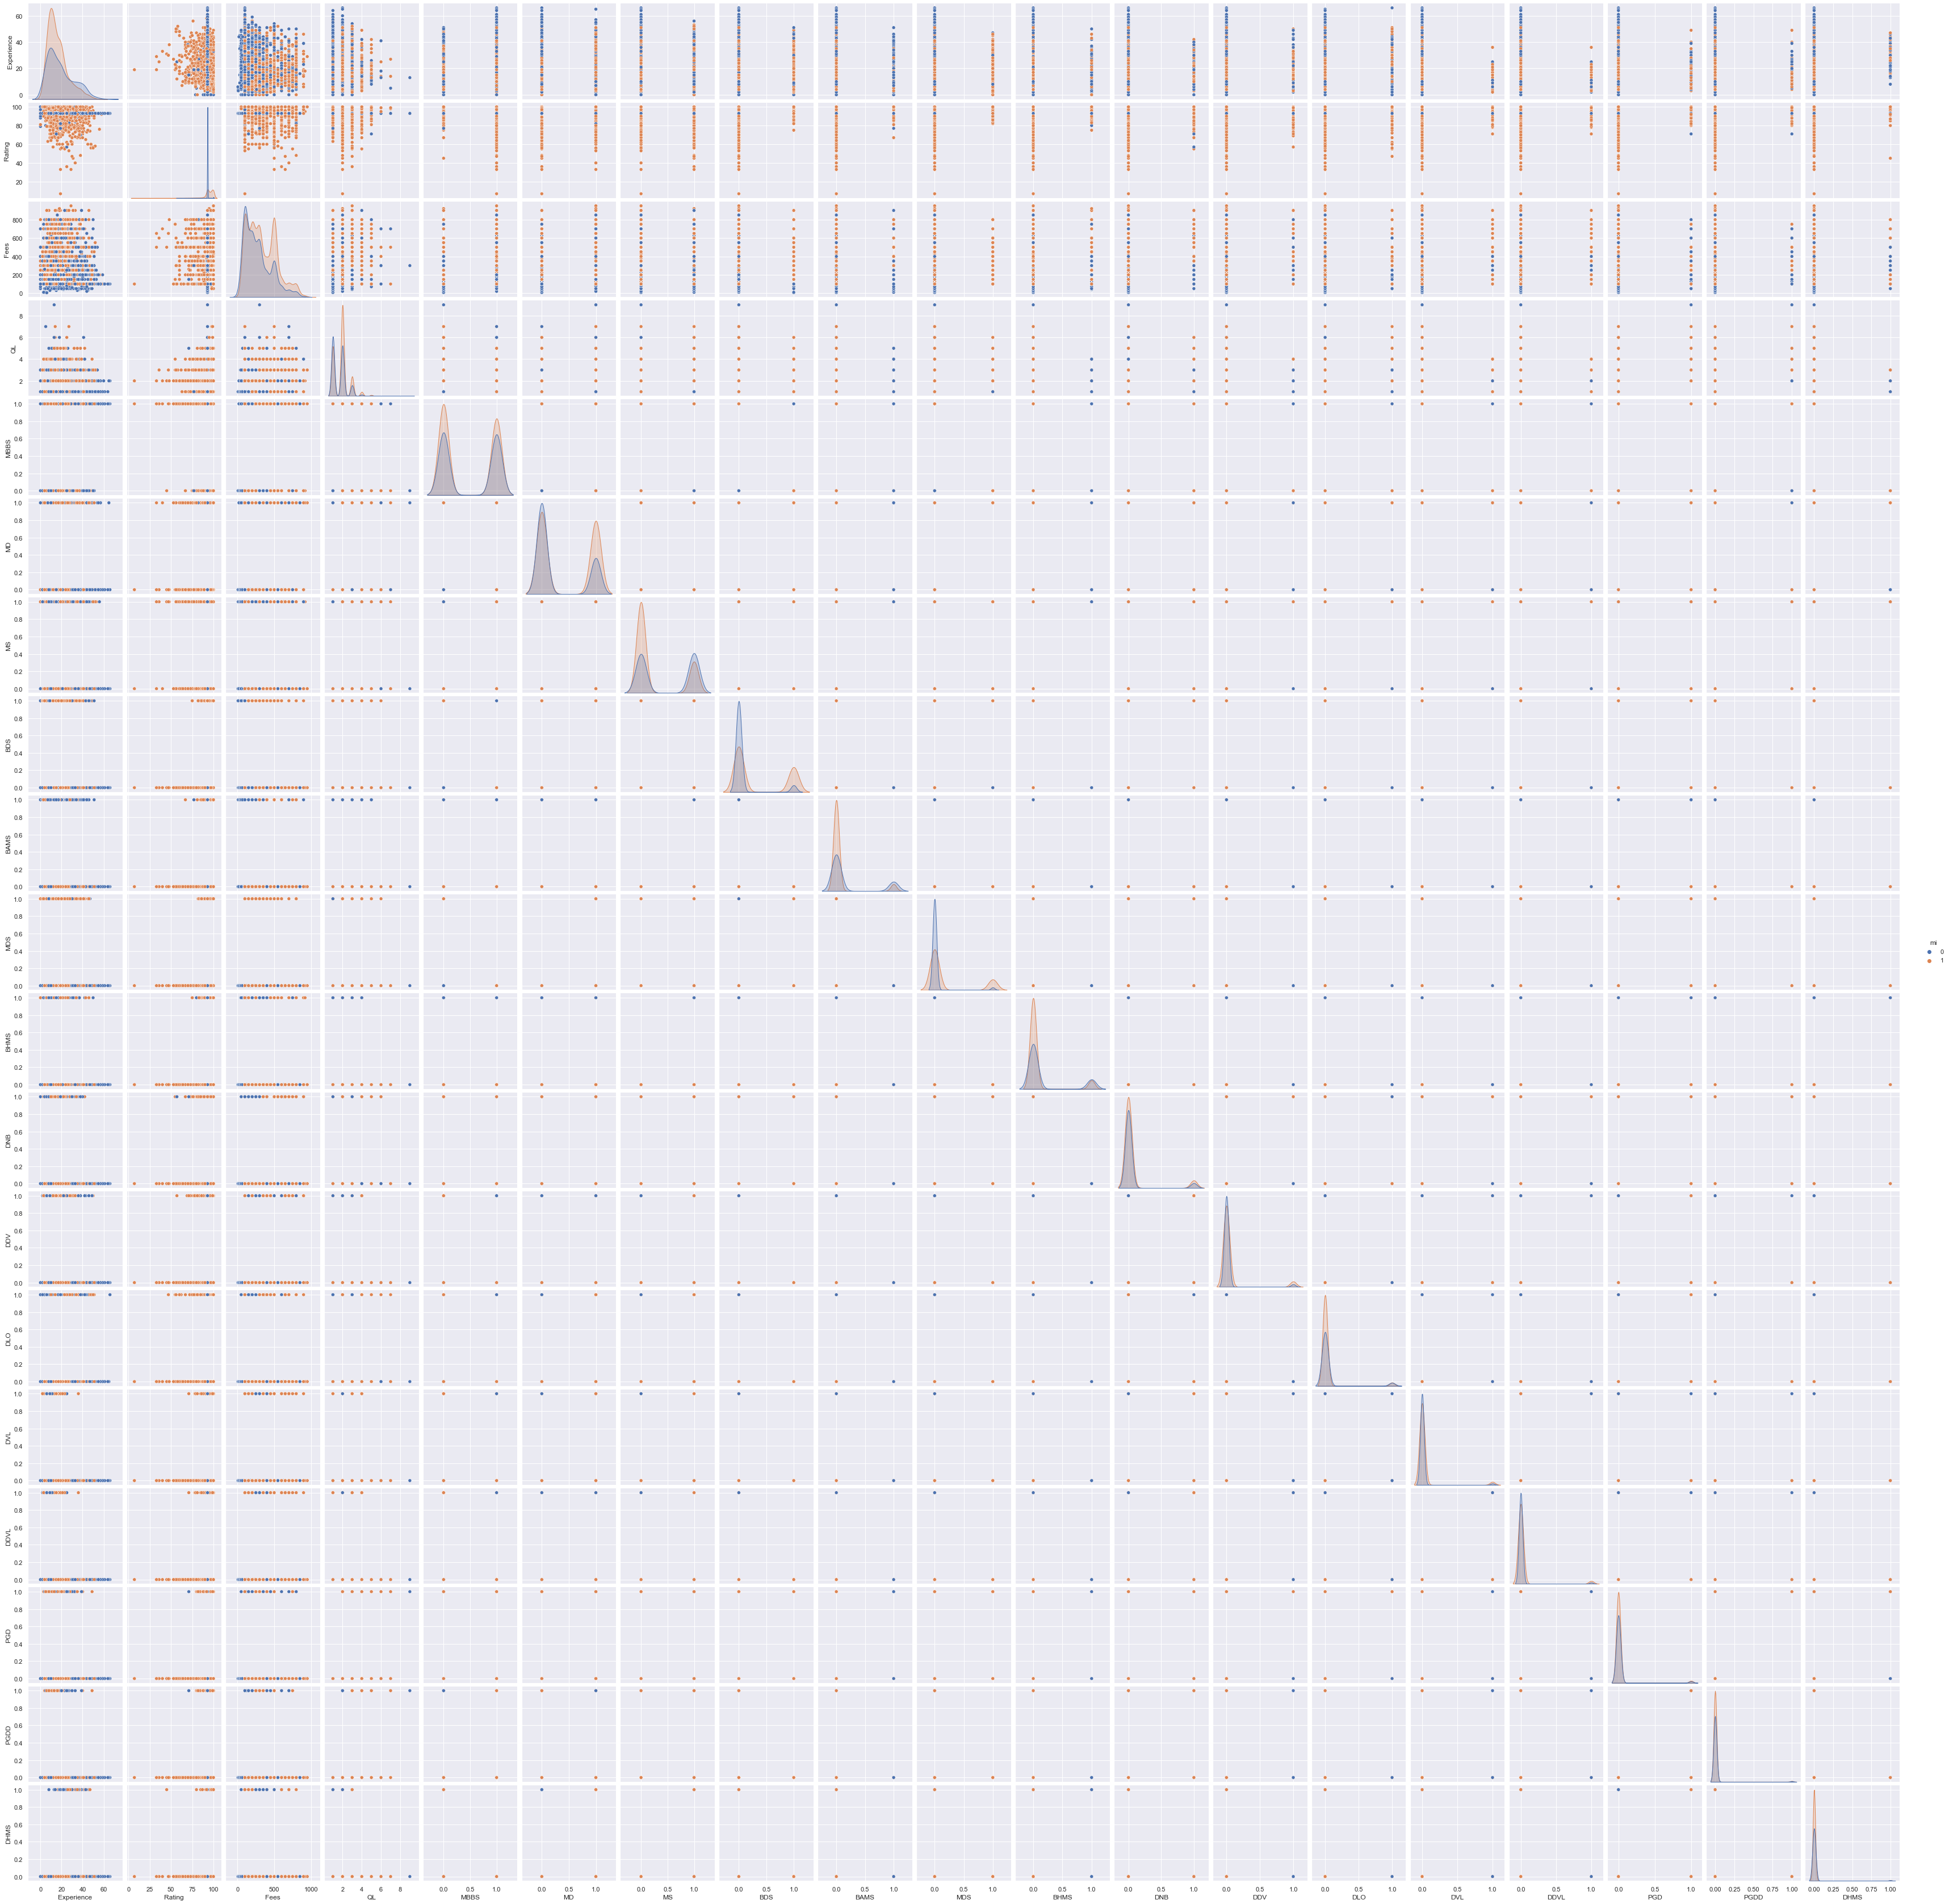

In [57]:
sns.pairplot(df, hue ='mi')

<AxesSubplot:xlabel='Experience', ylabel='count'>

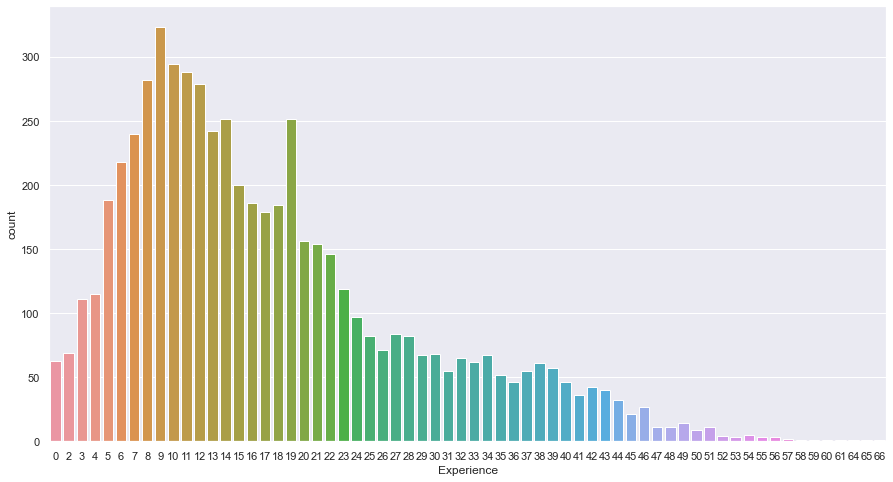

In [58]:
plt.figure(figsize = (15,8))
sns.countplot(x= 'Experience', data = df)

<AxesSubplot:xlabel='City', ylabel='count'>

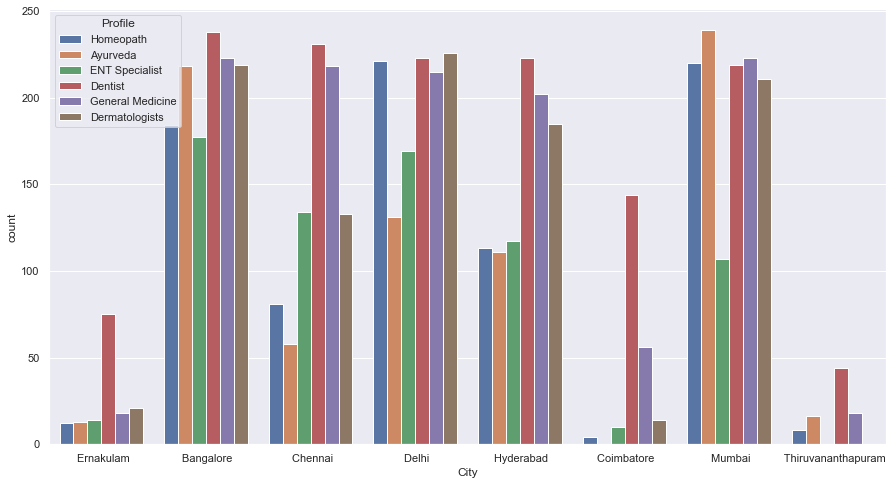

In [59]:
#Relating rating with City
plt.figure(figsize = (15,8))
sns.countplot(df['City'], hue = df['Profile'])

<AxesSubplot:xlabel='Profile', ylabel='count'>

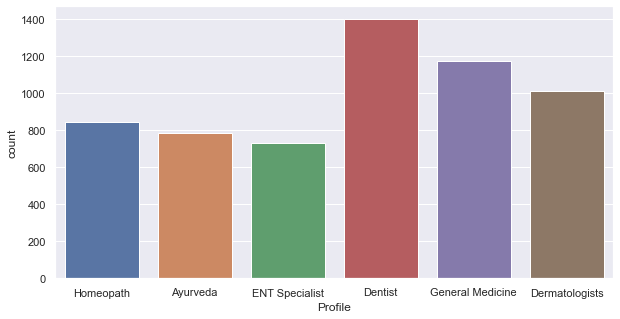

In [60]:
plt.figure(figsize = (10,5))
sns.countplot(df['Profile'])

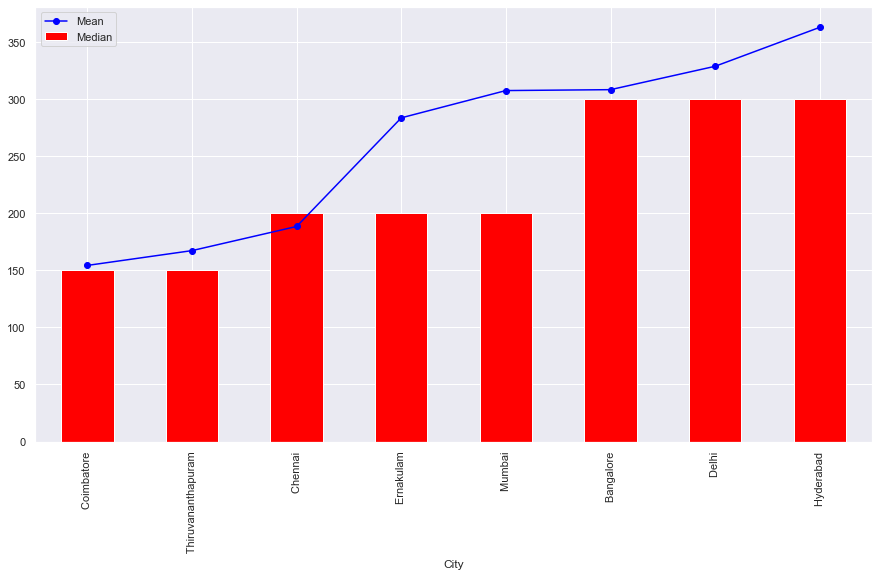

In [61]:
plt.figure(figsize = (15,8))
(df.groupby('City')['Fees'].mean()).sort_values().plot(kind = 'line', color = 'blue', marker  = 'o')
(df.groupby('City')['Fees'].median()).sort_values().plot(kind = 'bar', color = 'red')
plt.legend(['Mean', 'Median'])
plt.show()

<AxesSubplot:xlabel='City', ylabel='Fees'>

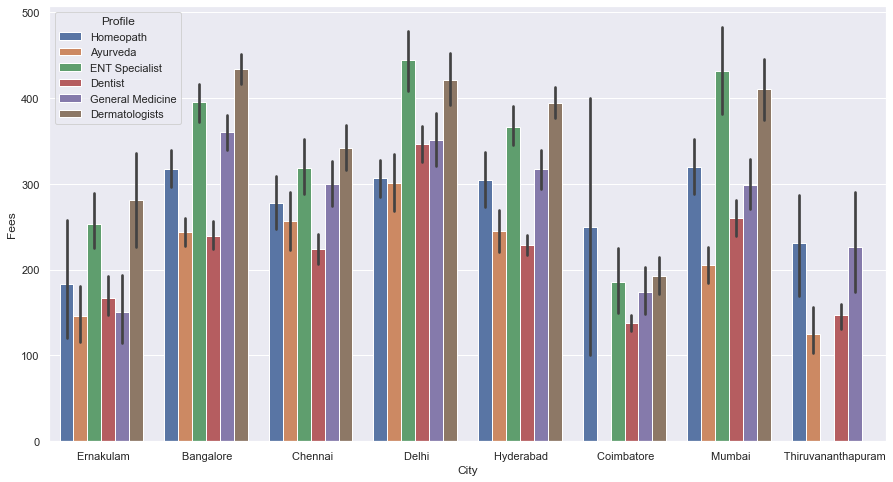

In [62]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'City', y = 'Fees', data = df, hue = 'Profile')

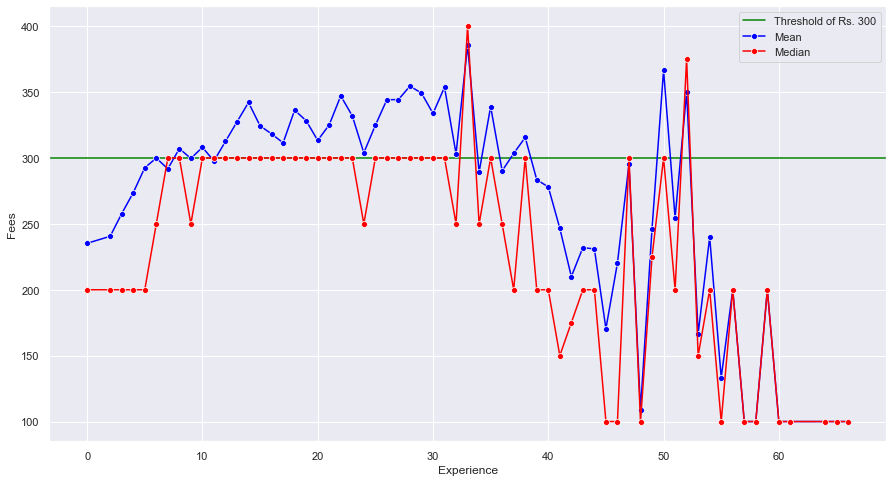

In [63]:
p = pd.DataFrame(df.groupby('Experience')['Fees'].mean())
q = pd.DataFrame(df.groupby('Experience')['Fees'].median())
p.reset_index(inplace = True)
q.reset_index(inplace = True)
plt.figure(figsize = (15,8))
plt.axhline(y=300, color = 'green')
sns.lineplot(x='Experience', y='Fees', data = p, marker = 'o', color = 'blue')
sns.lineplot(x='Experience', y='Fees', data = q, marker = 'o', color = 'red')
plt.legend(['Threshold of Rs. 300','Mean', 'Median'])
plt.show()

<AxesSubplot:xlabel='City', ylabel='Experience'>

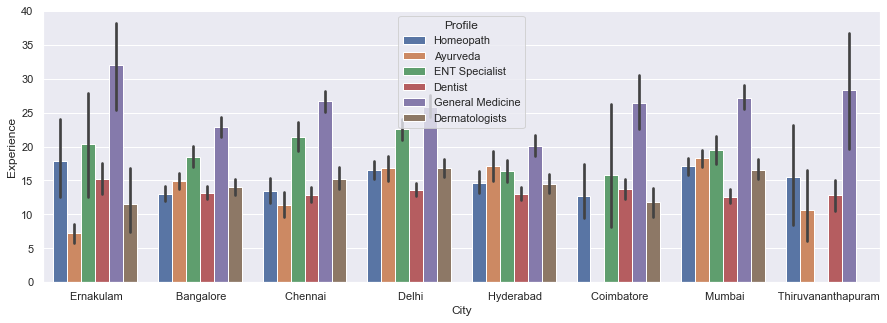

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(y="Experience",x="City",hue='Profile',data=df)

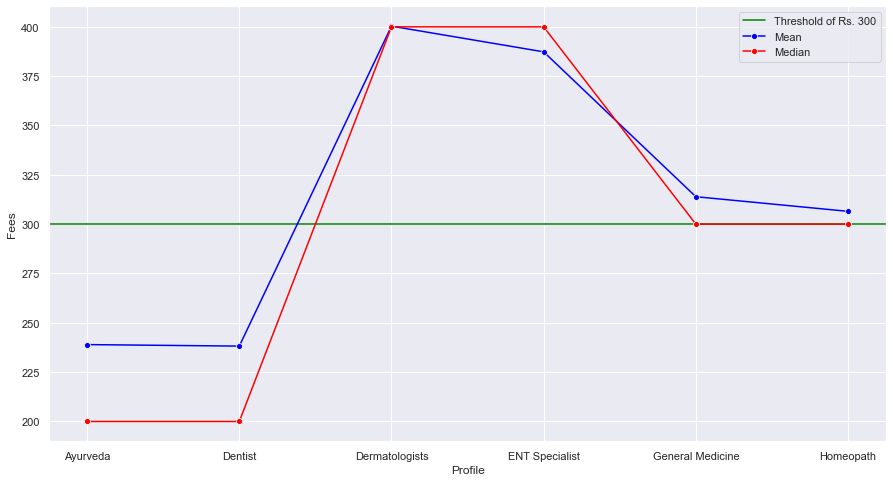

In [65]:
p = pd.DataFrame(df.groupby('Profile')['Fees'].mean())
q = pd.DataFrame(df.groupby('Profile')['Fees'].median())
p.reset_index(inplace = True)
q.reset_index(inplace = True)
plt.figure(figsize = (15,8))
plt.axhline(y=300, color = 'green')
sns.lineplot(x='Profile', y='Fees', data = p, marker = 'o', color = 'blue')
sns.lineplot(x='Profile', y='Fees', data = q, marker = 'o', color = 'red')
plt.legend(['Threshold of Rs. 300','Mean', 'Median'])
plt.show()

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

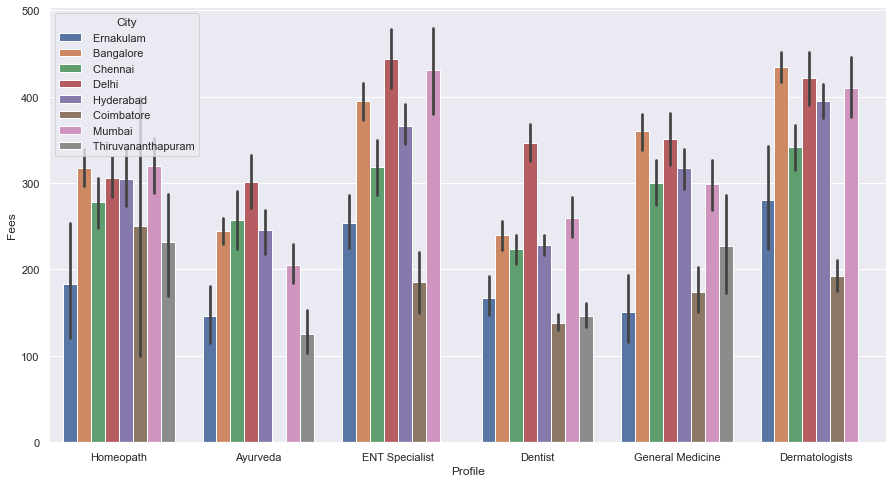

In [66]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Profile', y = 'Fees', data = df, hue = 'City')

In [67]:
df.groupby('mi')['Fees'].mean() #the mean fees of the doctors with misleneous info is Rs.60 higher

mi
0    273.261272
1    336.424723
Name: Fees, dtype: float64

In [68]:
df.groupby('mi')['Fees'].median() #the median fees of the doctors with misleneous info is Rs.100 higher

mi
0    200
1    300
Name: Fees, dtype: int64

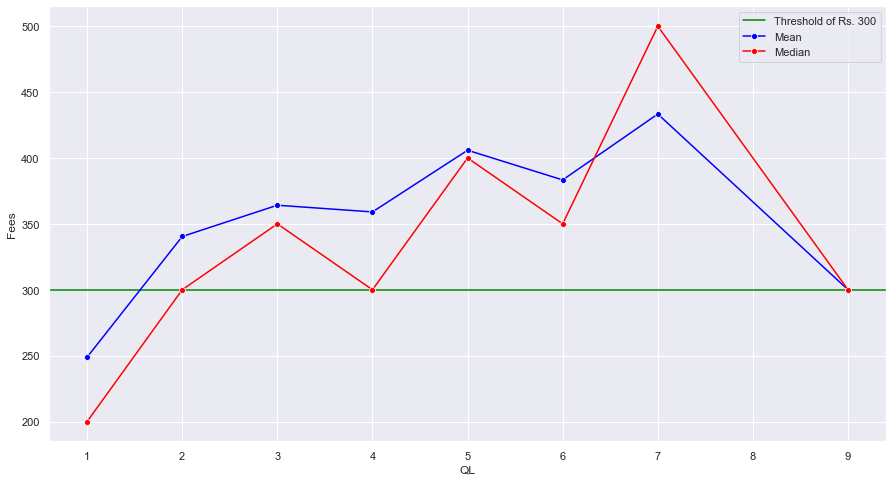

In [69]:
#Number of qualificatio relating to the fees charged
p = pd.DataFrame(df.groupby('QL')['Fees'].mean())
q = pd.DataFrame(df.groupby('QL')['Fees'].median())
p.reset_index(inplace = True)
q.reset_index(inplace = True)
plt.figure(figsize = (15,8))
plt.axhline(y=300, color = 'green')
sns.lineplot(x='QL', y='Fees', data = p, marker = 'o', color = 'blue')
sns.lineplot(x='QL', y='Fees', data = q, marker = 'o', color = 'red')
plt.legend(['Threshold of Rs. 300','Mean', 'Median'])
plt.show()

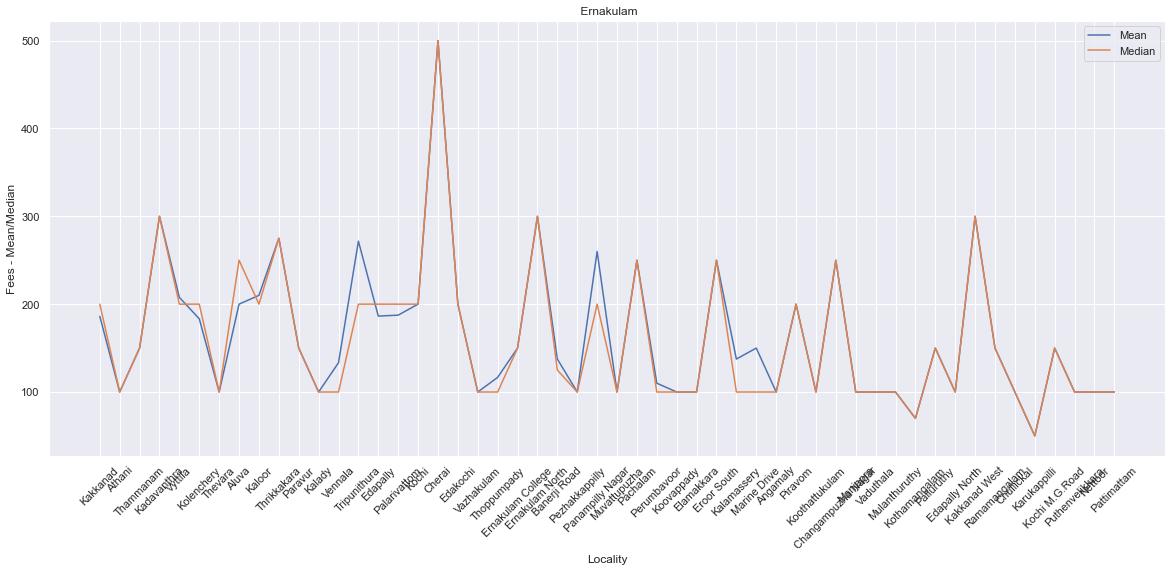

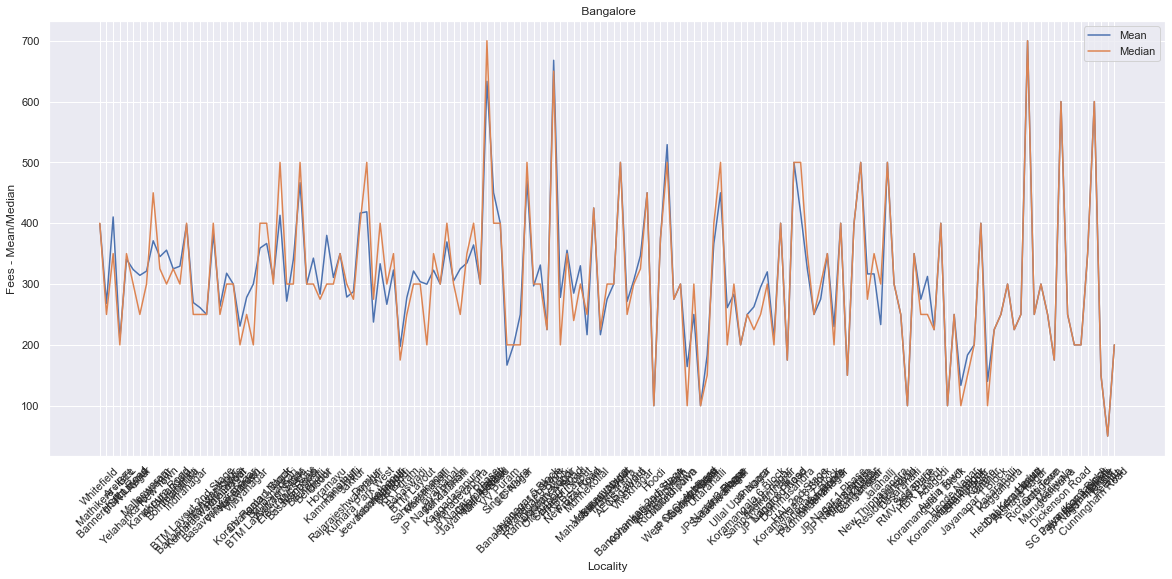

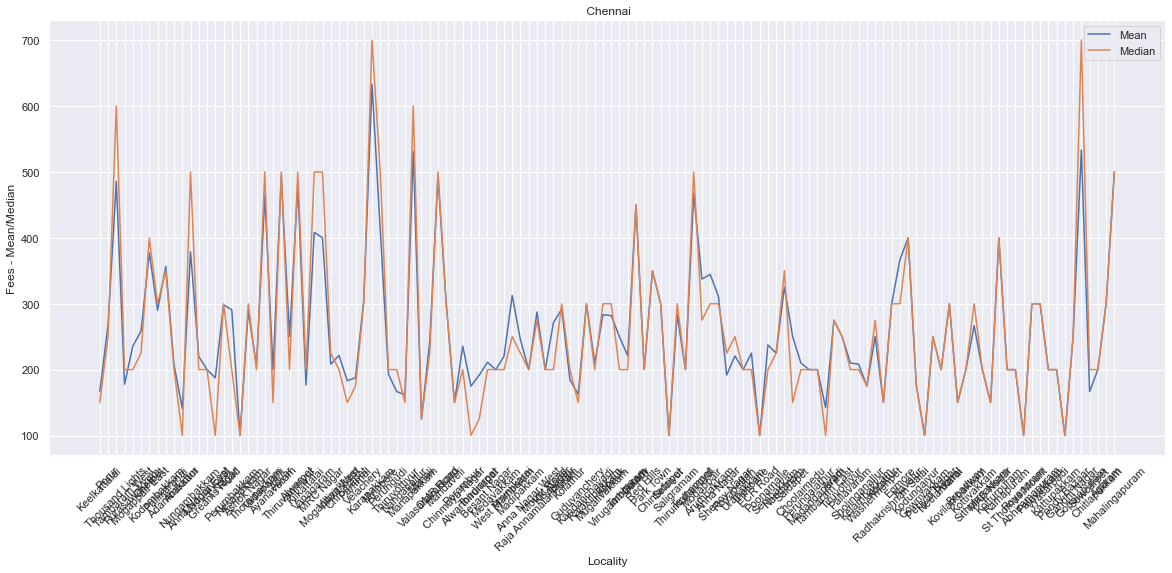

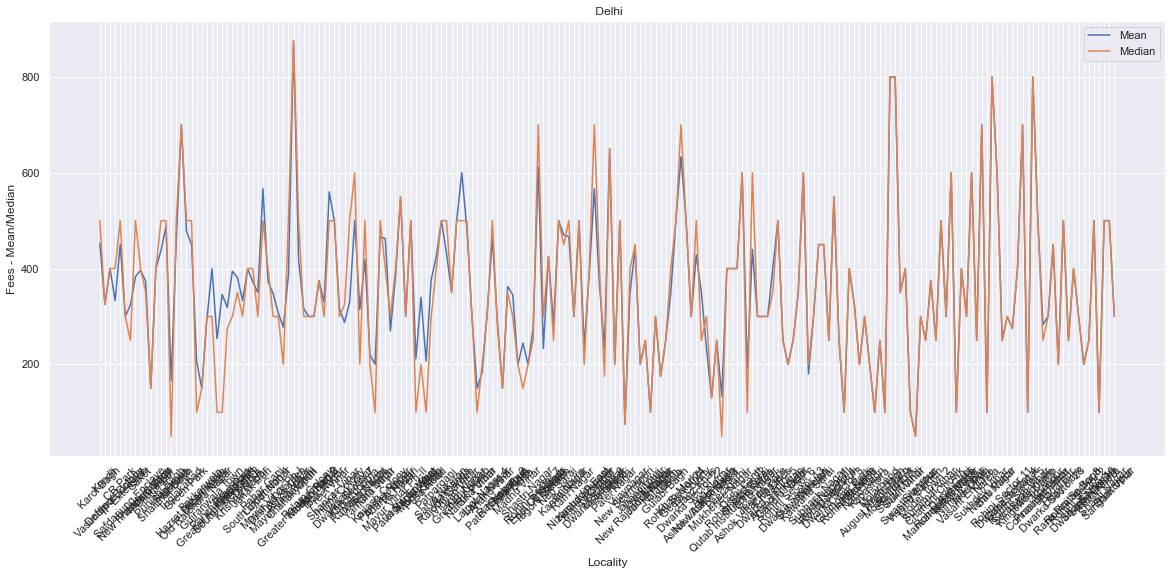

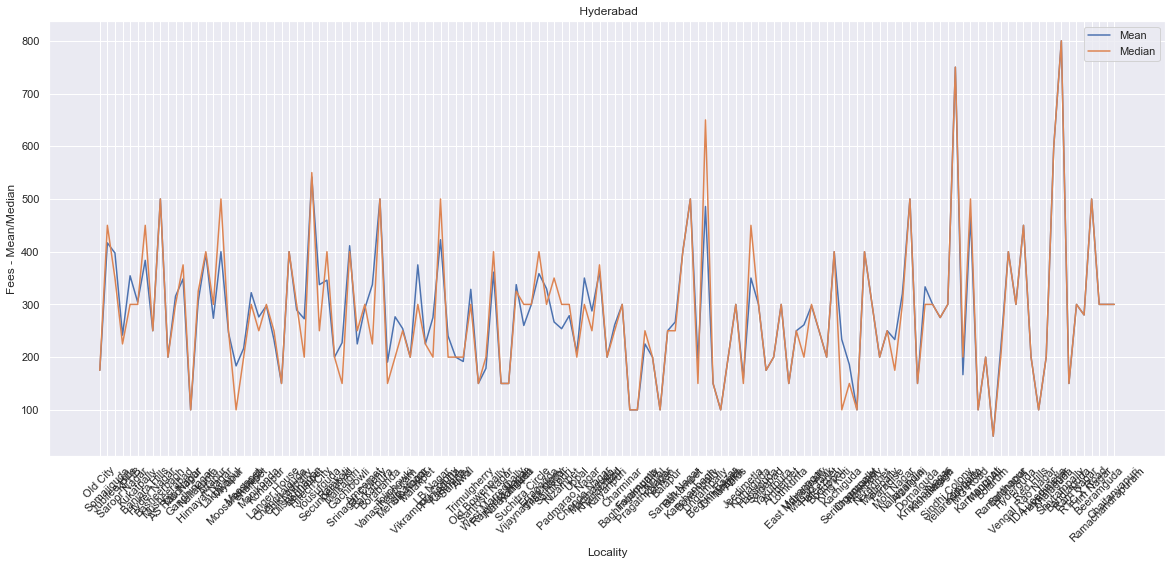

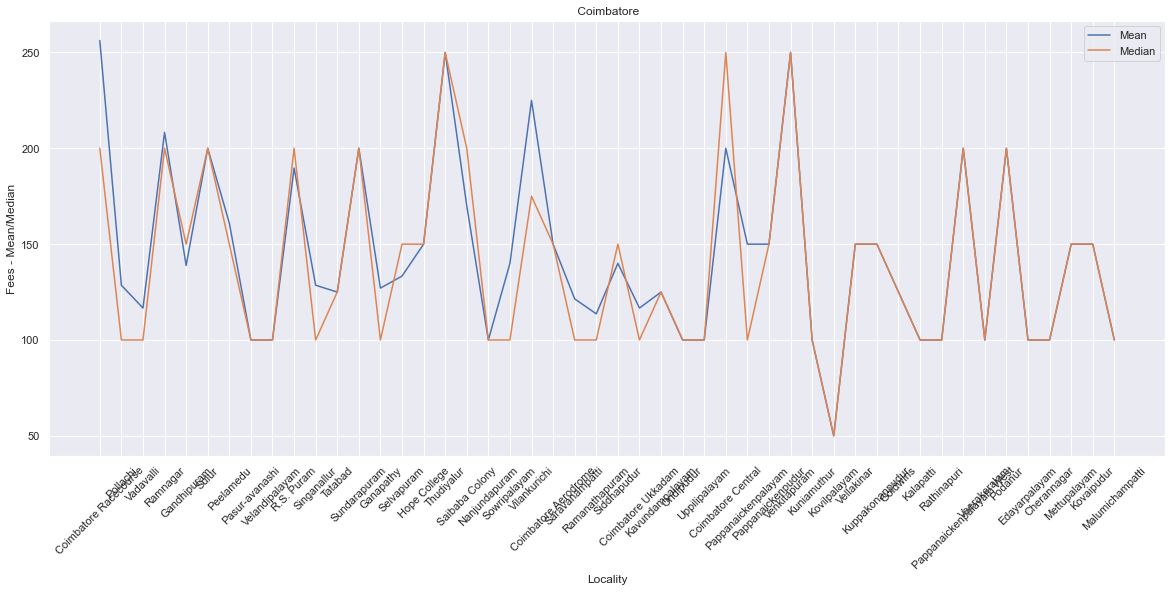

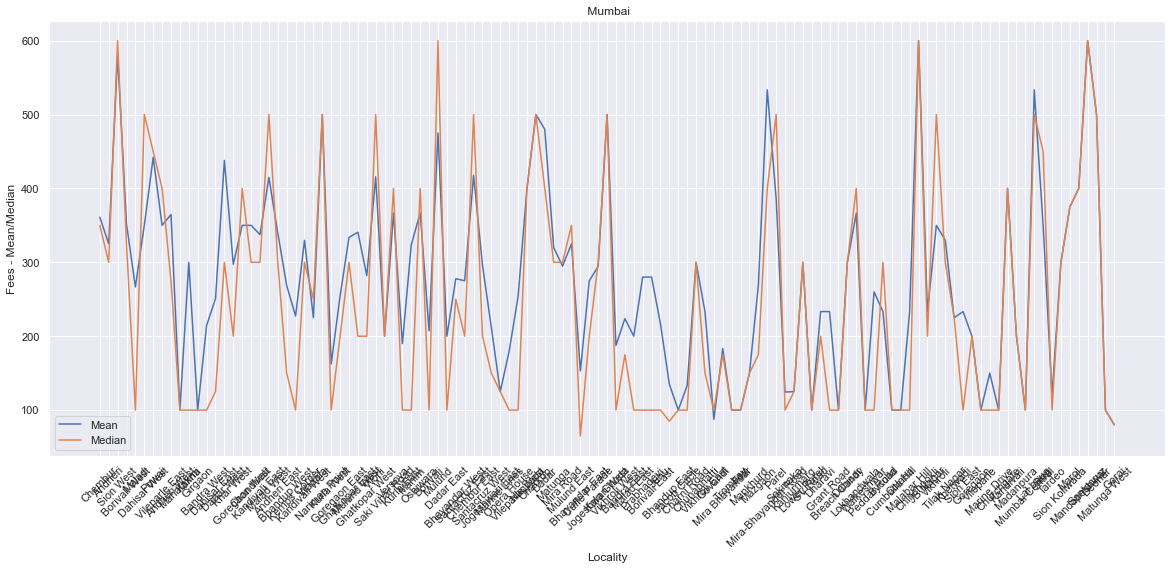

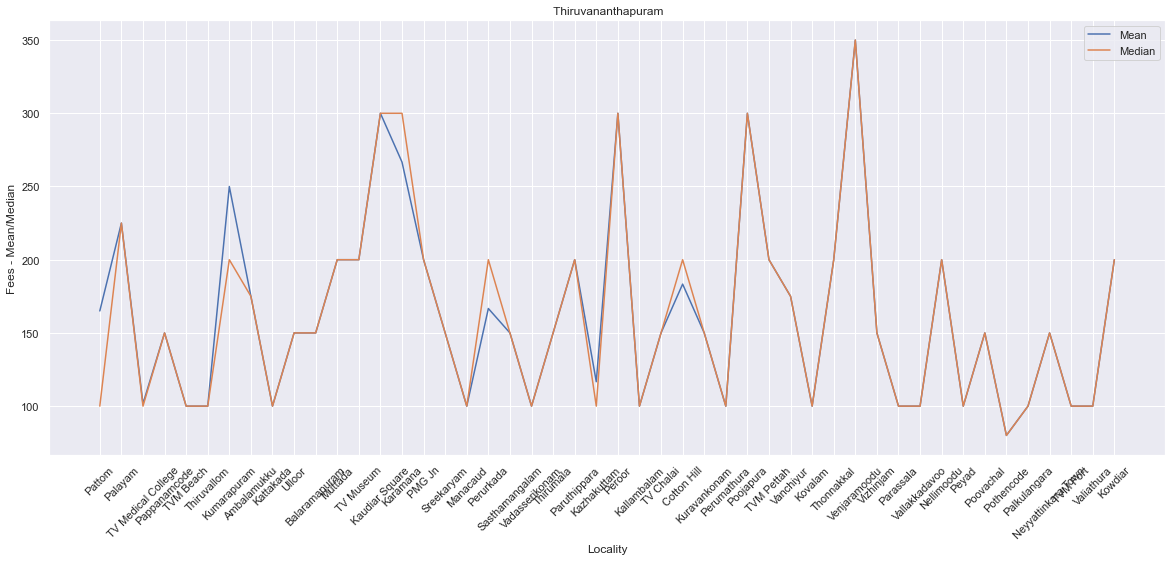

In [70]:
for city in df['City'].unique():   
    temp = df.groupby('Locality')
    local = df[df['City'] == city]['Locality'].unique()
    cityname ={}
    for loca in local:    
        cityname[loca] = temp.get_group(loca)['Fees'].mean(), temp.get_group(loca)['Fees'].median() 
    
    c = pd.DataFrame.from_dict(cityname,orient='index', columns = ['mean', 'median'])
    c.reset_index(inplace = True)

    plt.figure(figsize = (20,8))
    ax =sns.lineplot(x = 'index', y = 'mean', data =c)
    sns.lineplot(x = 'index', y = 'median', data =c)
    ax.set(ylabel="Fees - Mean/Median", xlabel = "Locality")
    plt.legend(['Mean', 'Median'])
    plt.title(city)
    plt.xticks(rotation=45) 
    plt.show()
    

In [71]:
df[top_qualification]

MBBS   MD   MS  BDS  BAMS  MDS  BHMS  DNB  DDV  DLO  DVL  DDVL  PGD  \
0      0.0  1.0  1.0  0.0   0.0  0.0   1.0  0.0  0.0  0.0  0.0   0.0  0.0   
1      0.0  1.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
2      1.0  0.0  1.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
3      0.0  0.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
4      0.0  0.0  1.0  0.0   1.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
...    ...  ...  ...  ...   ...  ...   ...  ...  ...  ...  ...   ...  ...   
5931   1.0  0.0  1.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5932   1.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5933   1.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5934   1.0  1.0  0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   
5935   0.0  1.0  0.0  1.0   0.0  1.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   

      PGDD  DHMS  
0      0.0   0.0  
1      0.0   0.0  
2      0.0   0.0  
3      0.0   0.0  
4      0.0   0.0  
...    ...   ...  
5931   0.0   0.0  
5932   0.0   0.0  
5933   0.0   0.0  
5934   0.0   0.0  
5935   0.0   0.0  

[5936 rows x 15 columns]

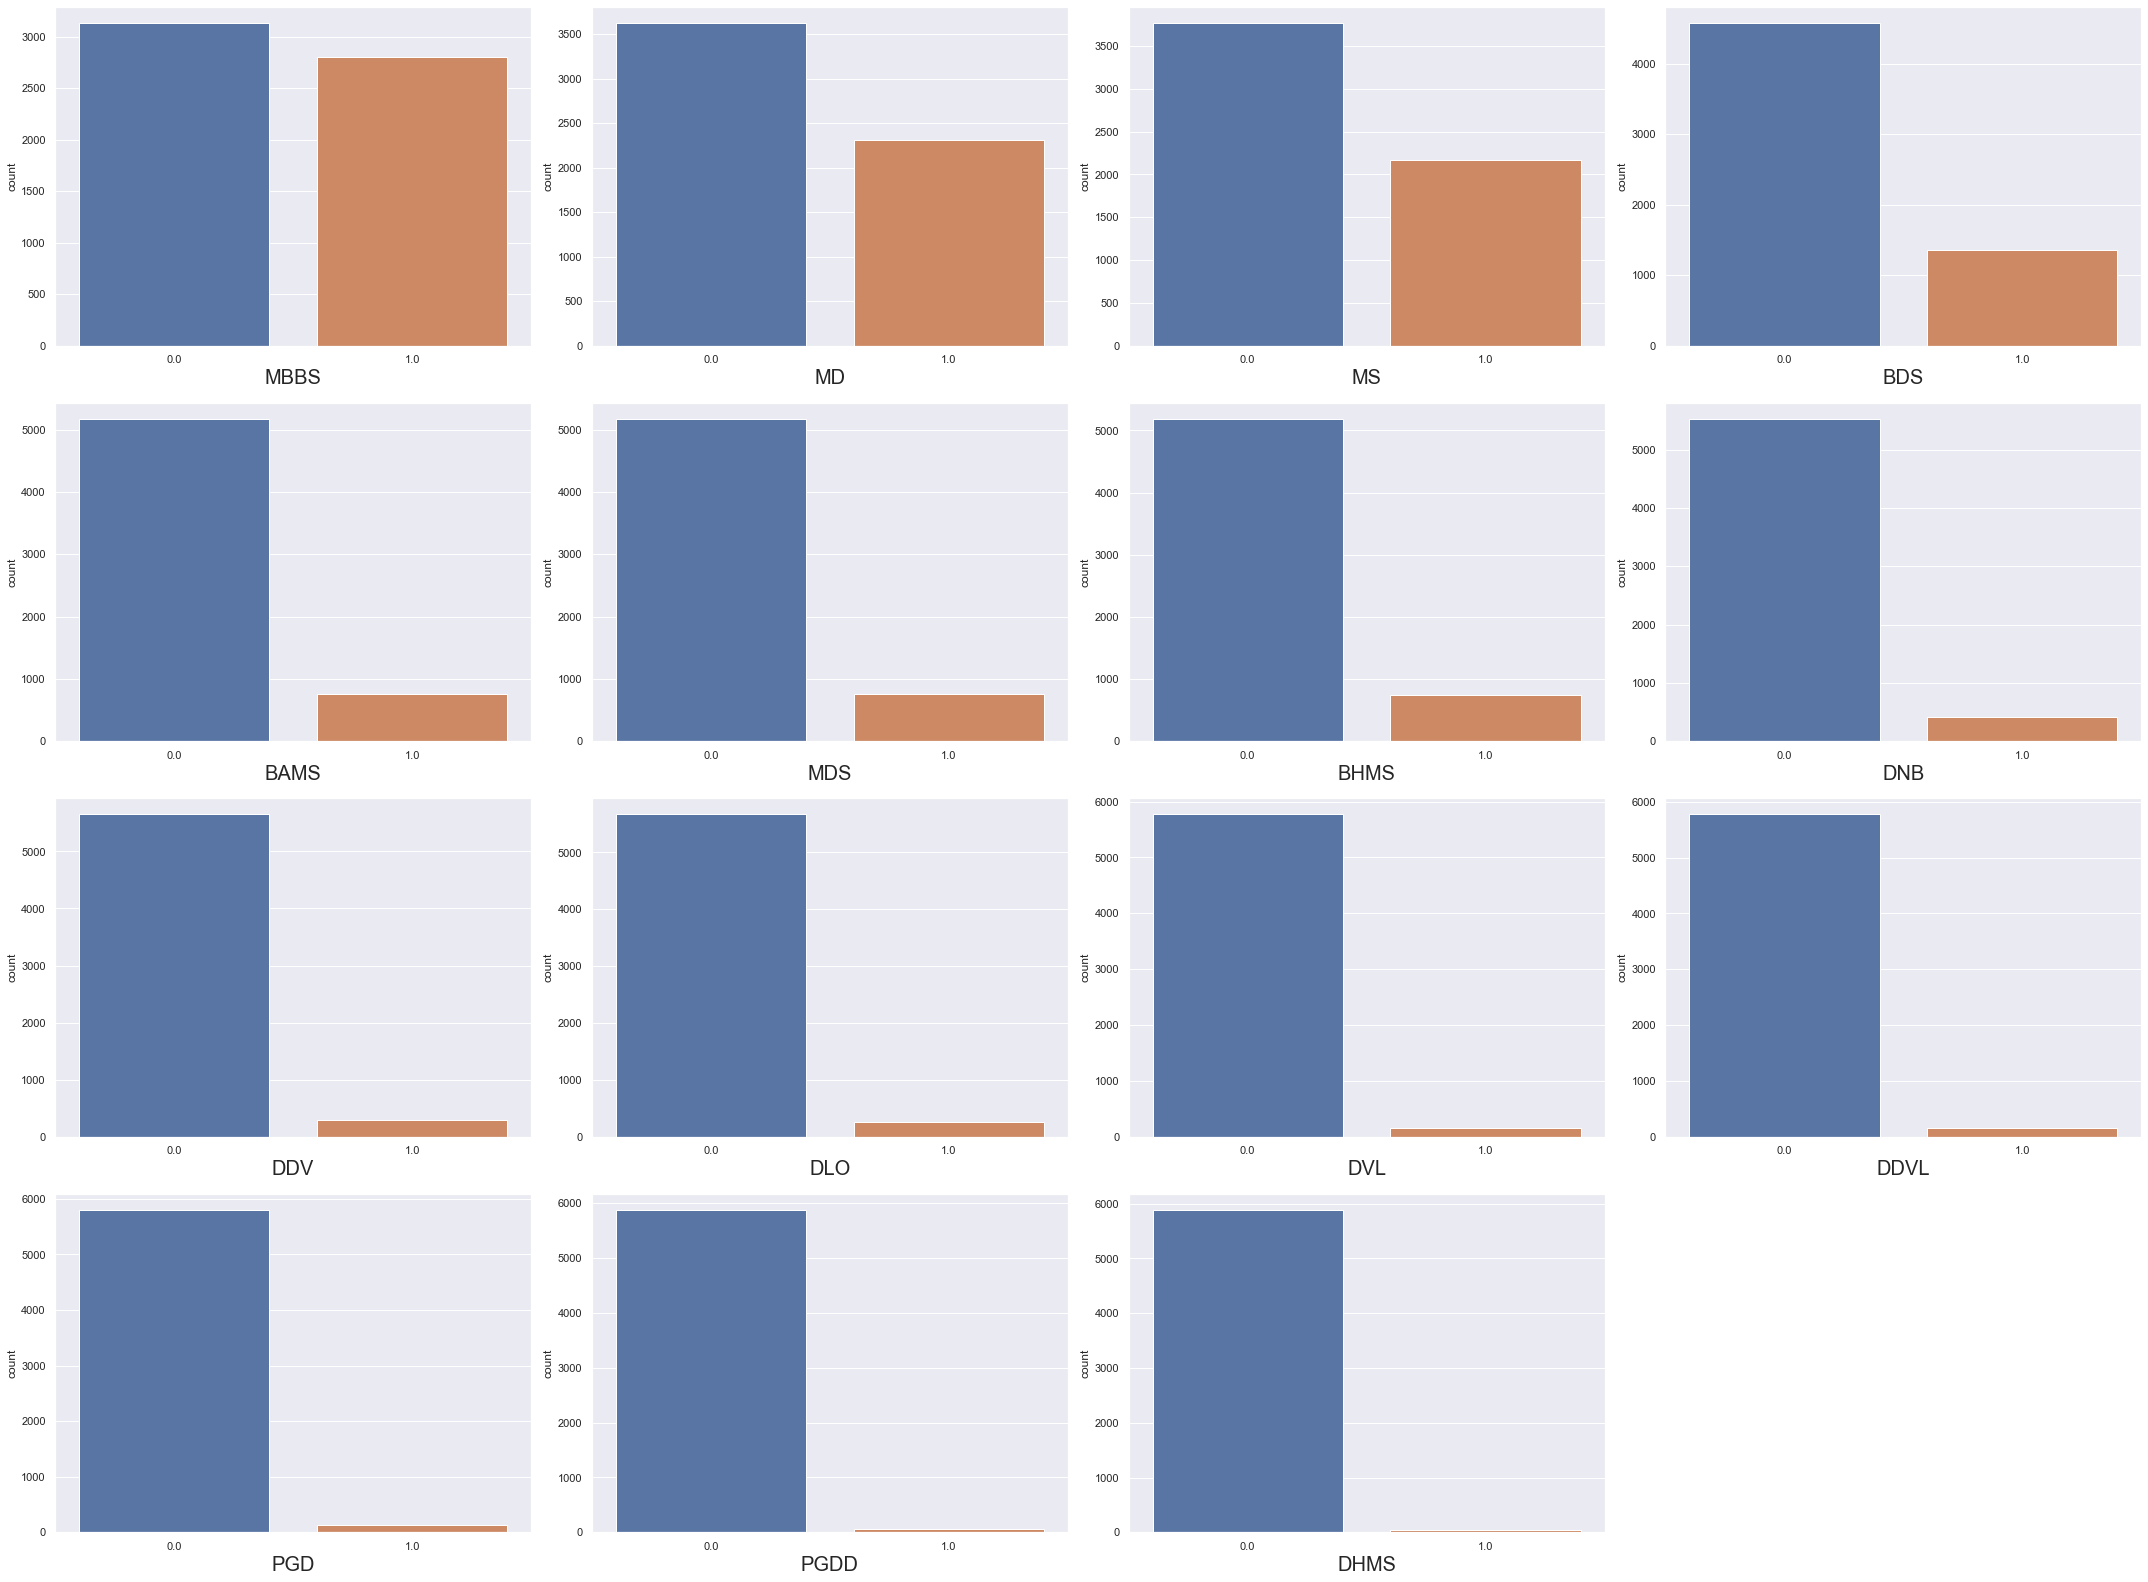

In [72]:
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1
for column in top_qualification:
    ax = plt.subplot(11,4,plotnumber)
    sns.countplot(df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Preprocessing

In [73]:
df.head()

Locality        City  Experience  Rating         Profile  Fees  \
0           Kakkanad   Ernakulam          24   100.0       Homeopath   100   
1         Whitefield   Bangalore          12    98.0        Ayurveda   350   
2    Mathikere - BEL   Bangalore           9    93.0  ENT Specialist   300   
3  Bannerghatta Road   Bangalore          12    93.0        Ayurveda   250   
4       Keelkattalai     Chennai          20   100.0        Ayurveda   250   

   mi   QL  MBBS   MD  ...  MDS  BHMS  DNB  DDV  DLO  DVL  DDVL  PGD  PGDD  \
0   1  2.0   0.0  1.0  ...  0.0   1.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
1   1  2.0   0.0  1.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
2   0  2.0   1.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
3   1  1.0   0.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   
4   1  1.0   0.0  0.0  ...  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0   0.0   

   DHMS  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 23 columns]

In [74]:
#Dropping locality
df.drop('Locality', axis = 1, inplace = True)

In [75]:
df_final = pd.get_dummies(df, drop_first = True)

In [76]:
df_final

Experience  Rating  Fees  mi   QL  MBBS   MD   MS  BDS  BAMS  ...  \
0             24   100.0   100   1  2.0   0.0  1.0  1.0  0.0   0.0  ...   
1             12    98.0   350   1  2.0   0.0  1.0  1.0  0.0   1.0  ...   
2              9    93.0   300   0  2.0   1.0  0.0  1.0  0.0   0.0  ...   
3             12    93.0   250   1  1.0   0.0  0.0  1.0  0.0   1.0  ...   
4             20   100.0   250   1  1.0   0.0  0.0  1.0  0.0   1.0  ...   
...          ...     ...   ...  ..  ...   ...  ...  ...  ...   ...  ...   
5931          19    98.0   300   1  2.0   1.0  0.0  1.0  0.0   0.0  ...   
5932          33    93.0   100   0  1.0   1.0  0.0  0.0  0.0   0.0  ...   
5933          41    97.0   600   1  1.0   1.0  0.0  0.0  0.0   0.0  ...   
5934          15    90.0   100   1  2.0   1.0  1.0  0.0  0.0   0.0  ...   
5935          17   100.0   200   1  2.0   0.0  1.0  0.0  1.0   0.0  ...   

      City_ Delhi  City_ Ernakulam  City_ Hyderabad  City_ Mumbai  \
0               0                1                0             0   
1               0                0                0             0   
2               0                0                0             0   
3               0                0                0             0   
4               0                0                0             0   
...           ...              ...              ...           ...   
5931            0                0                0             0   
5932            0                0                0             0   
5933            1                0                0             0   
5934            0                0                0             1   
5935            1                0                0             0   

      City_ Thiruvananthapuram  Profile_Dentist  Profile_Dermatologists  \
0                            0                0                       0   
1                            0                0                       0   
2                            0                0                       0   
3                            0                0                       0   
4                            0                0                       0   
...                        ...              ...                     ...   
5931                         0                0                       0   
5932                         0                0                       0   
5933                         0                0                       0   
5934                         0                0                       0   
5935                         0                1                       0   

      Profile_ENT Specialist  Profile_General Medicine  Profile_Homeopath  
0                          0                         0                  1  
1                          0                         0                  0  
2                          1                         0                  0  
3                          0                         0                  0  
4                          0                         0                  0  
...                      ...                       ...                ...  
5931                       1                         0                  0  
5932                       0                         1                  0  
5933                       0                         1                  0  
5934                       0                         1                  0  
5935                       0                         0                  0  

[5936 rows x 32 columns]

<AxesSubplot:>

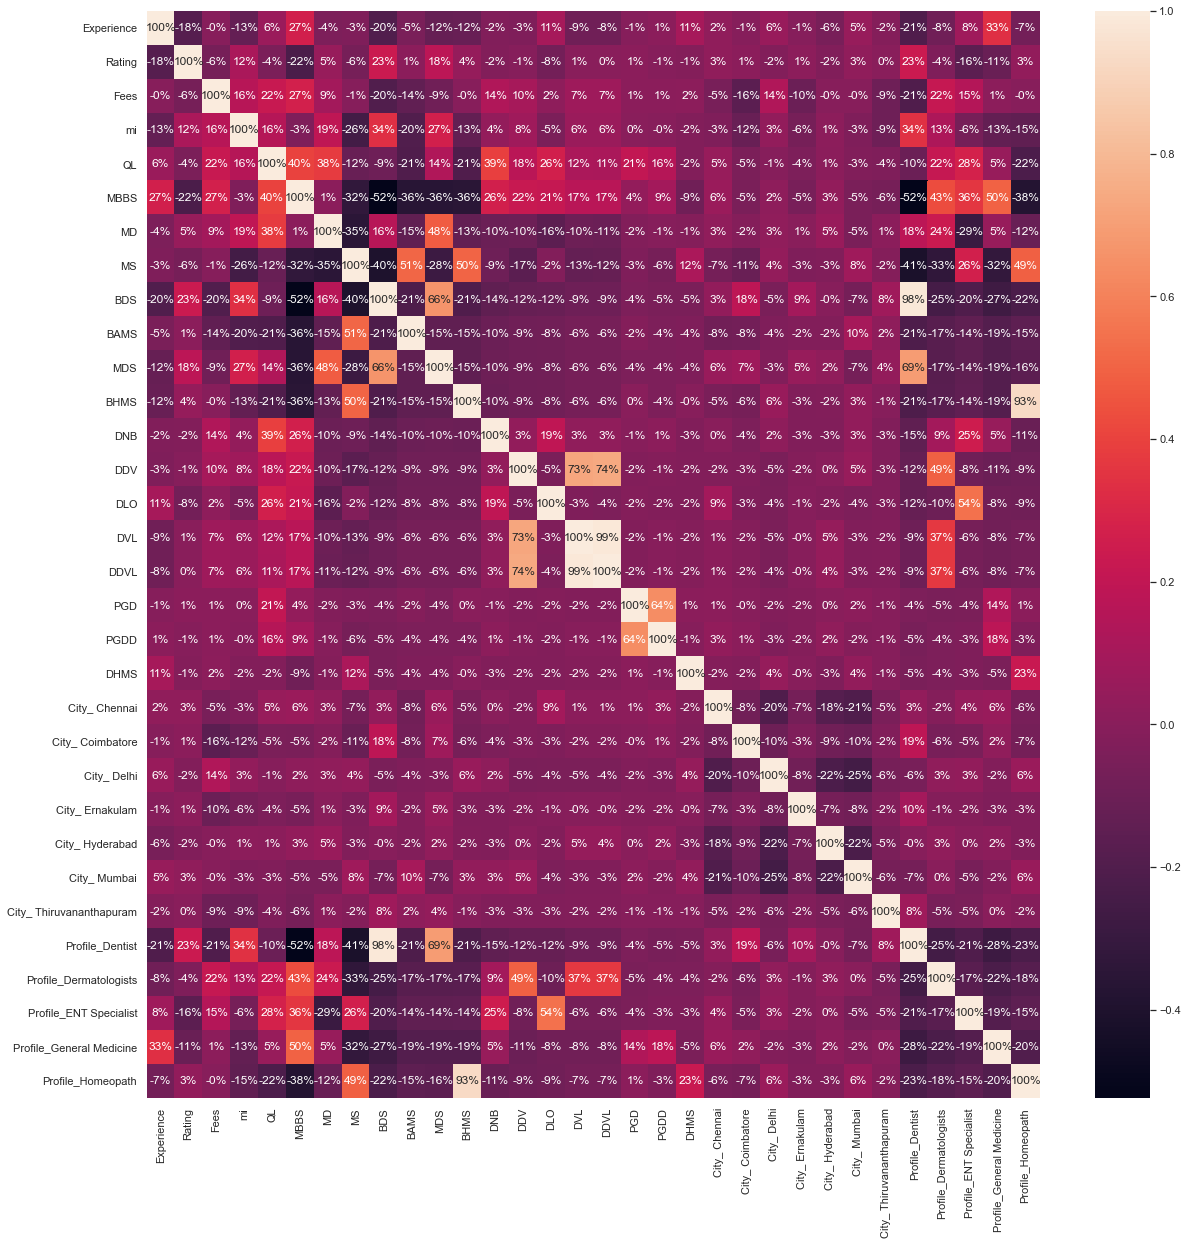

In [77]:
plt.figure(figsize = (20,20))
sns.heatmap(df_final.corr(), annot = True, fmt=".0%")

In [78]:
df_final.columns 

Index(['Experience', 'Rating', 'Fees', 'mi', 'QL', 'MBBS', 'MD', 'MS', 'BDS',
       'BAMS', 'MDS', 'BHMS', 'DNB', 'DDV', 'DLO', 'DVL', 'DDVL', 'PGD',
       'PGDD', 'DHMS', 'City_ Chennai', 'City_ Coimbatore', 'City_ Delhi',
       'City_ Ernakulam', 'City_ Hyderabad', 'City_ Mumbai',
       'City_ Thiruvananthapuram', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath'],
      dtype='object')

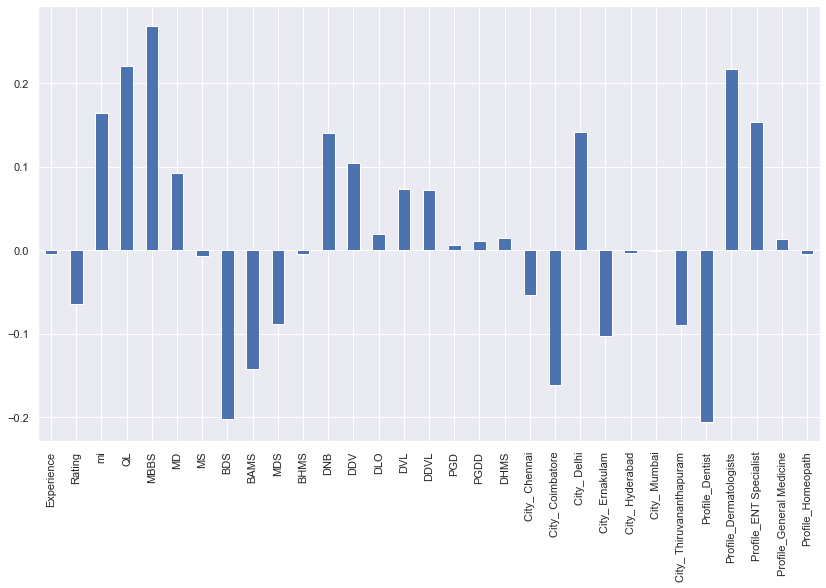

In [79]:
plt.figure(figsize=(14,8))
ax = df_final.drop('Fees',axis=1).corrwith(df_final['Fees']).plot(kind='bar',grid=True)
lab = ['Experience', 'Rating', 'mi', 'QL', 'MBBS', 'MD', 'MS', 'BDS',
       'BAMS', 'MDS', 'BHMS', 'DNB', 'DDV', 'DLO', 'DVL', 'DDVL', 'PGD',
       'PGDD', 'DHMS', 'City_ Chennai', 'City_ Coimbatore', 'City_ Delhi',
       'City_ Ernakulam', 'City_ Hyderabad', 'City_ Mumbai',
       'City_ Thiruvananthapuram', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath']
ax.set_xticklabels(lab)
plt.show()

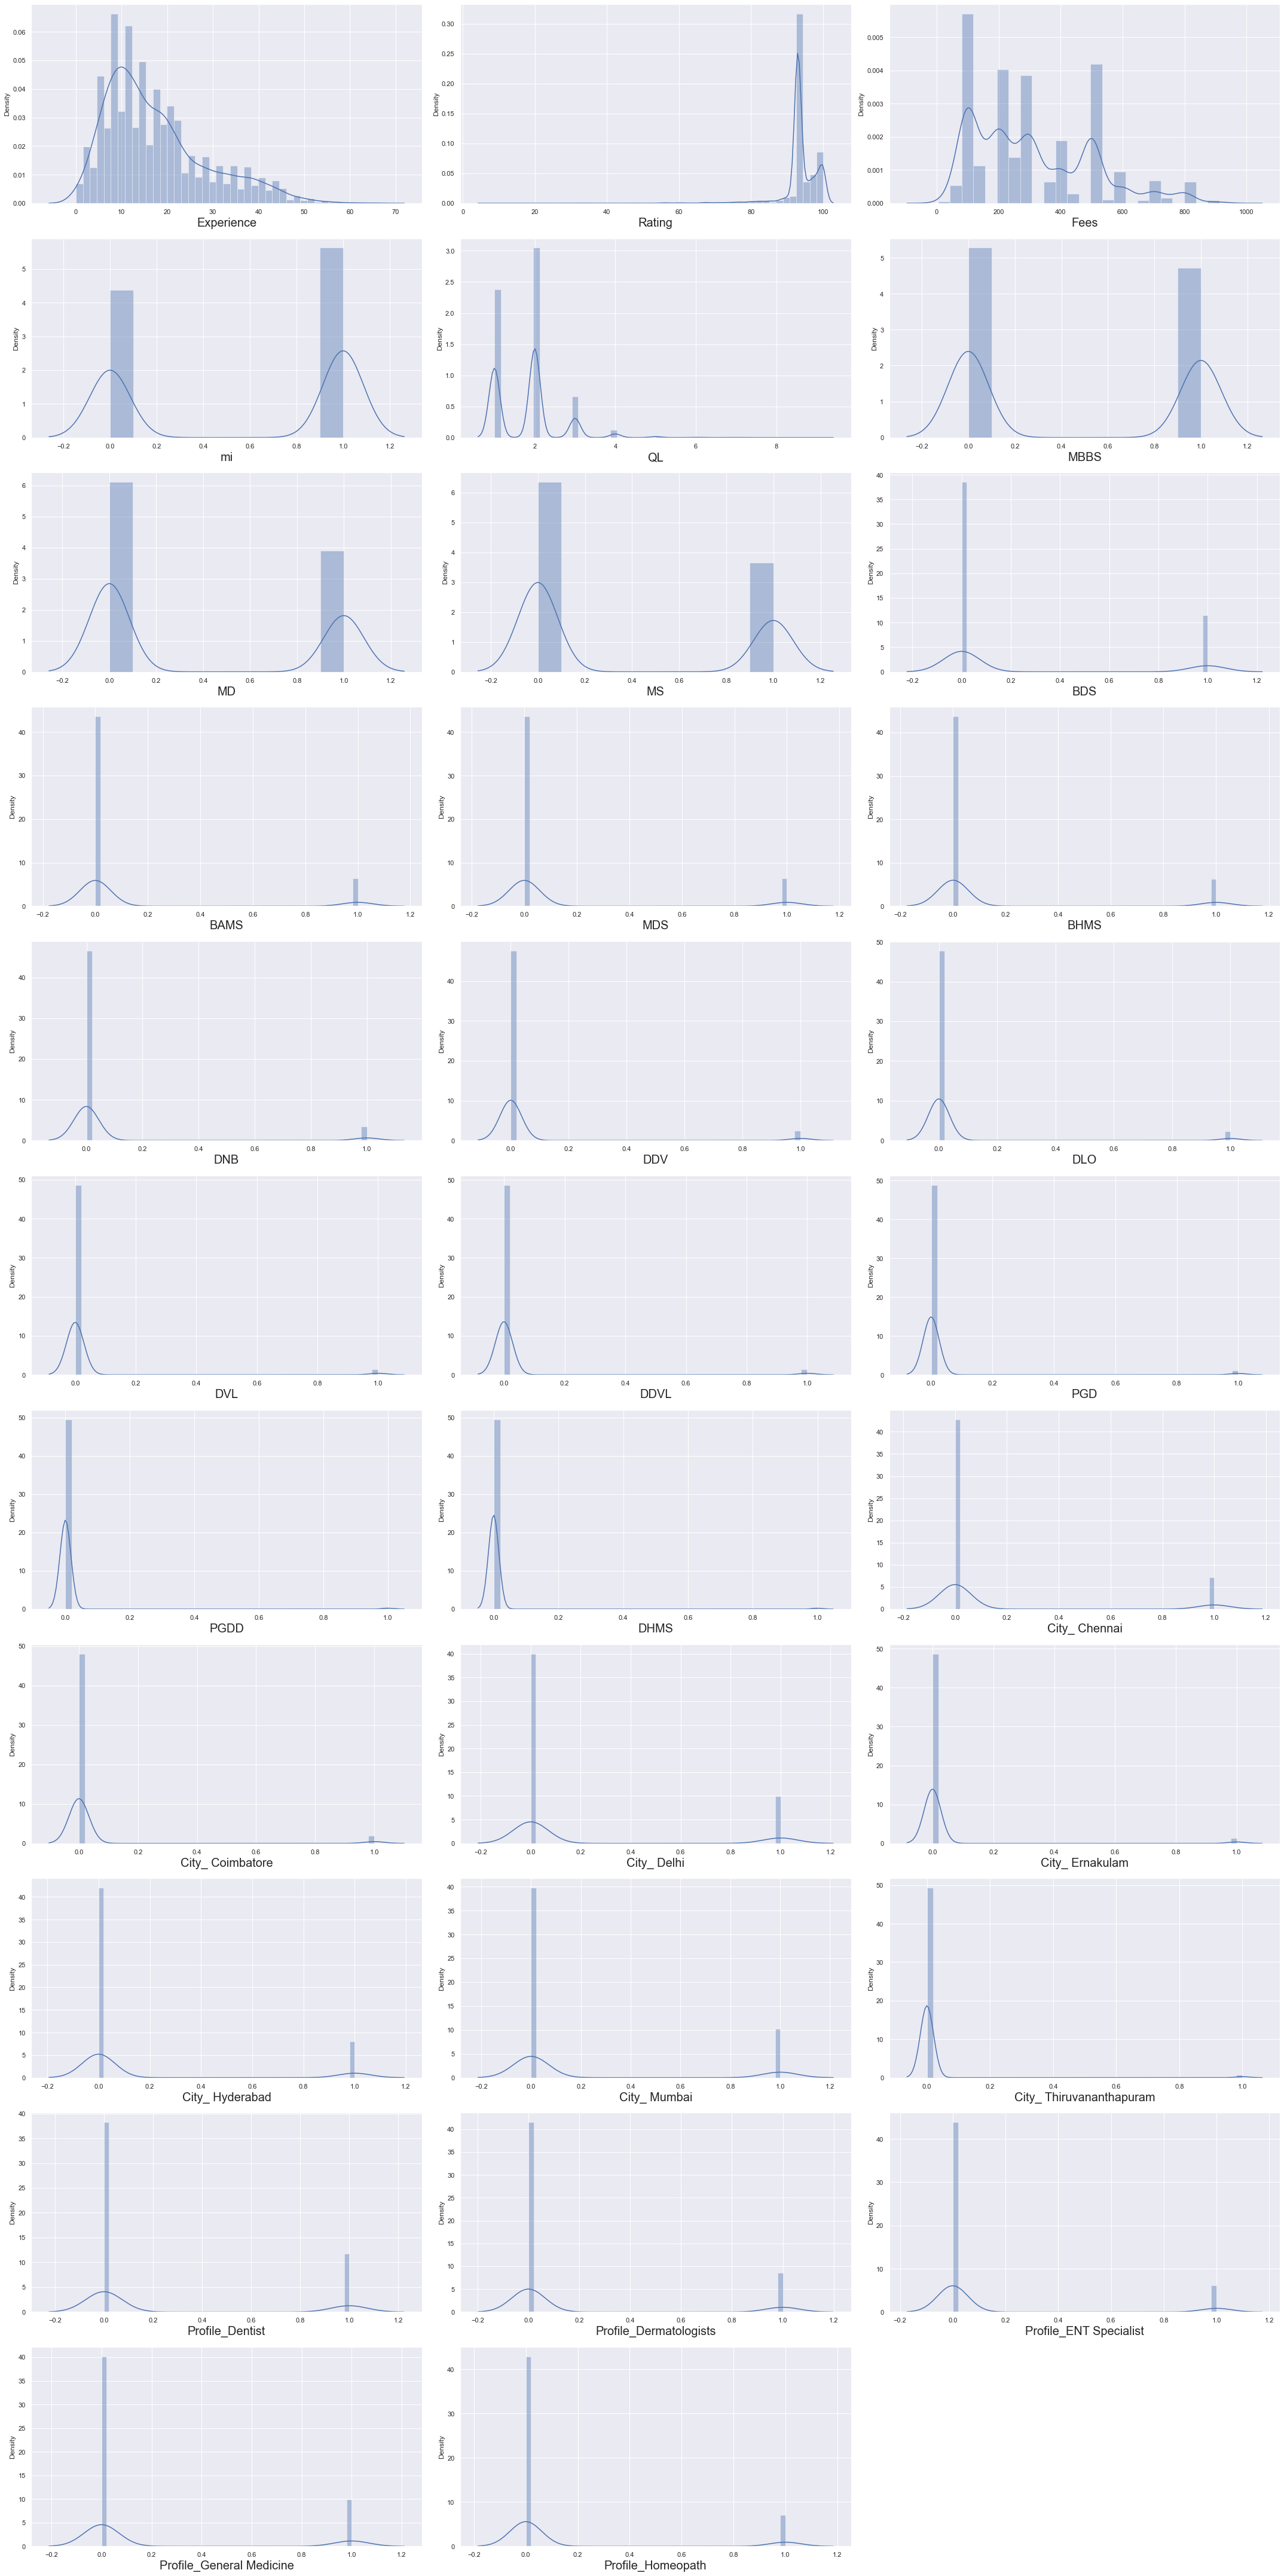

In [80]:
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1
for column in df_final:
    ax = plt.subplot(11,3,plotnumber)
    sns.distplot(df_final[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [81]:
#Normalizing Experience and  rating
df_final['Experience'] = np.log1p(df_final['Experience'])
df_final['Rating'] = np.log1p(df_final['Experience'])

<AxesSubplot:xlabel='Experience', ylabel='Density'>

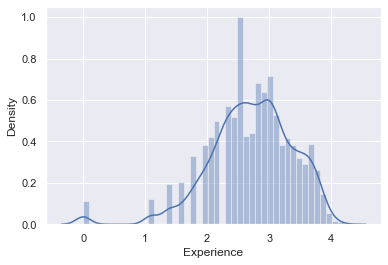

In [82]:
sns.distplot(df_final['Experience'])

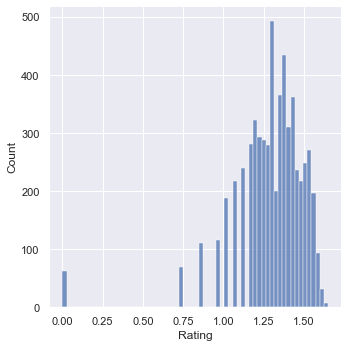

In [83]:
sns.displot(df_final['Rating'])

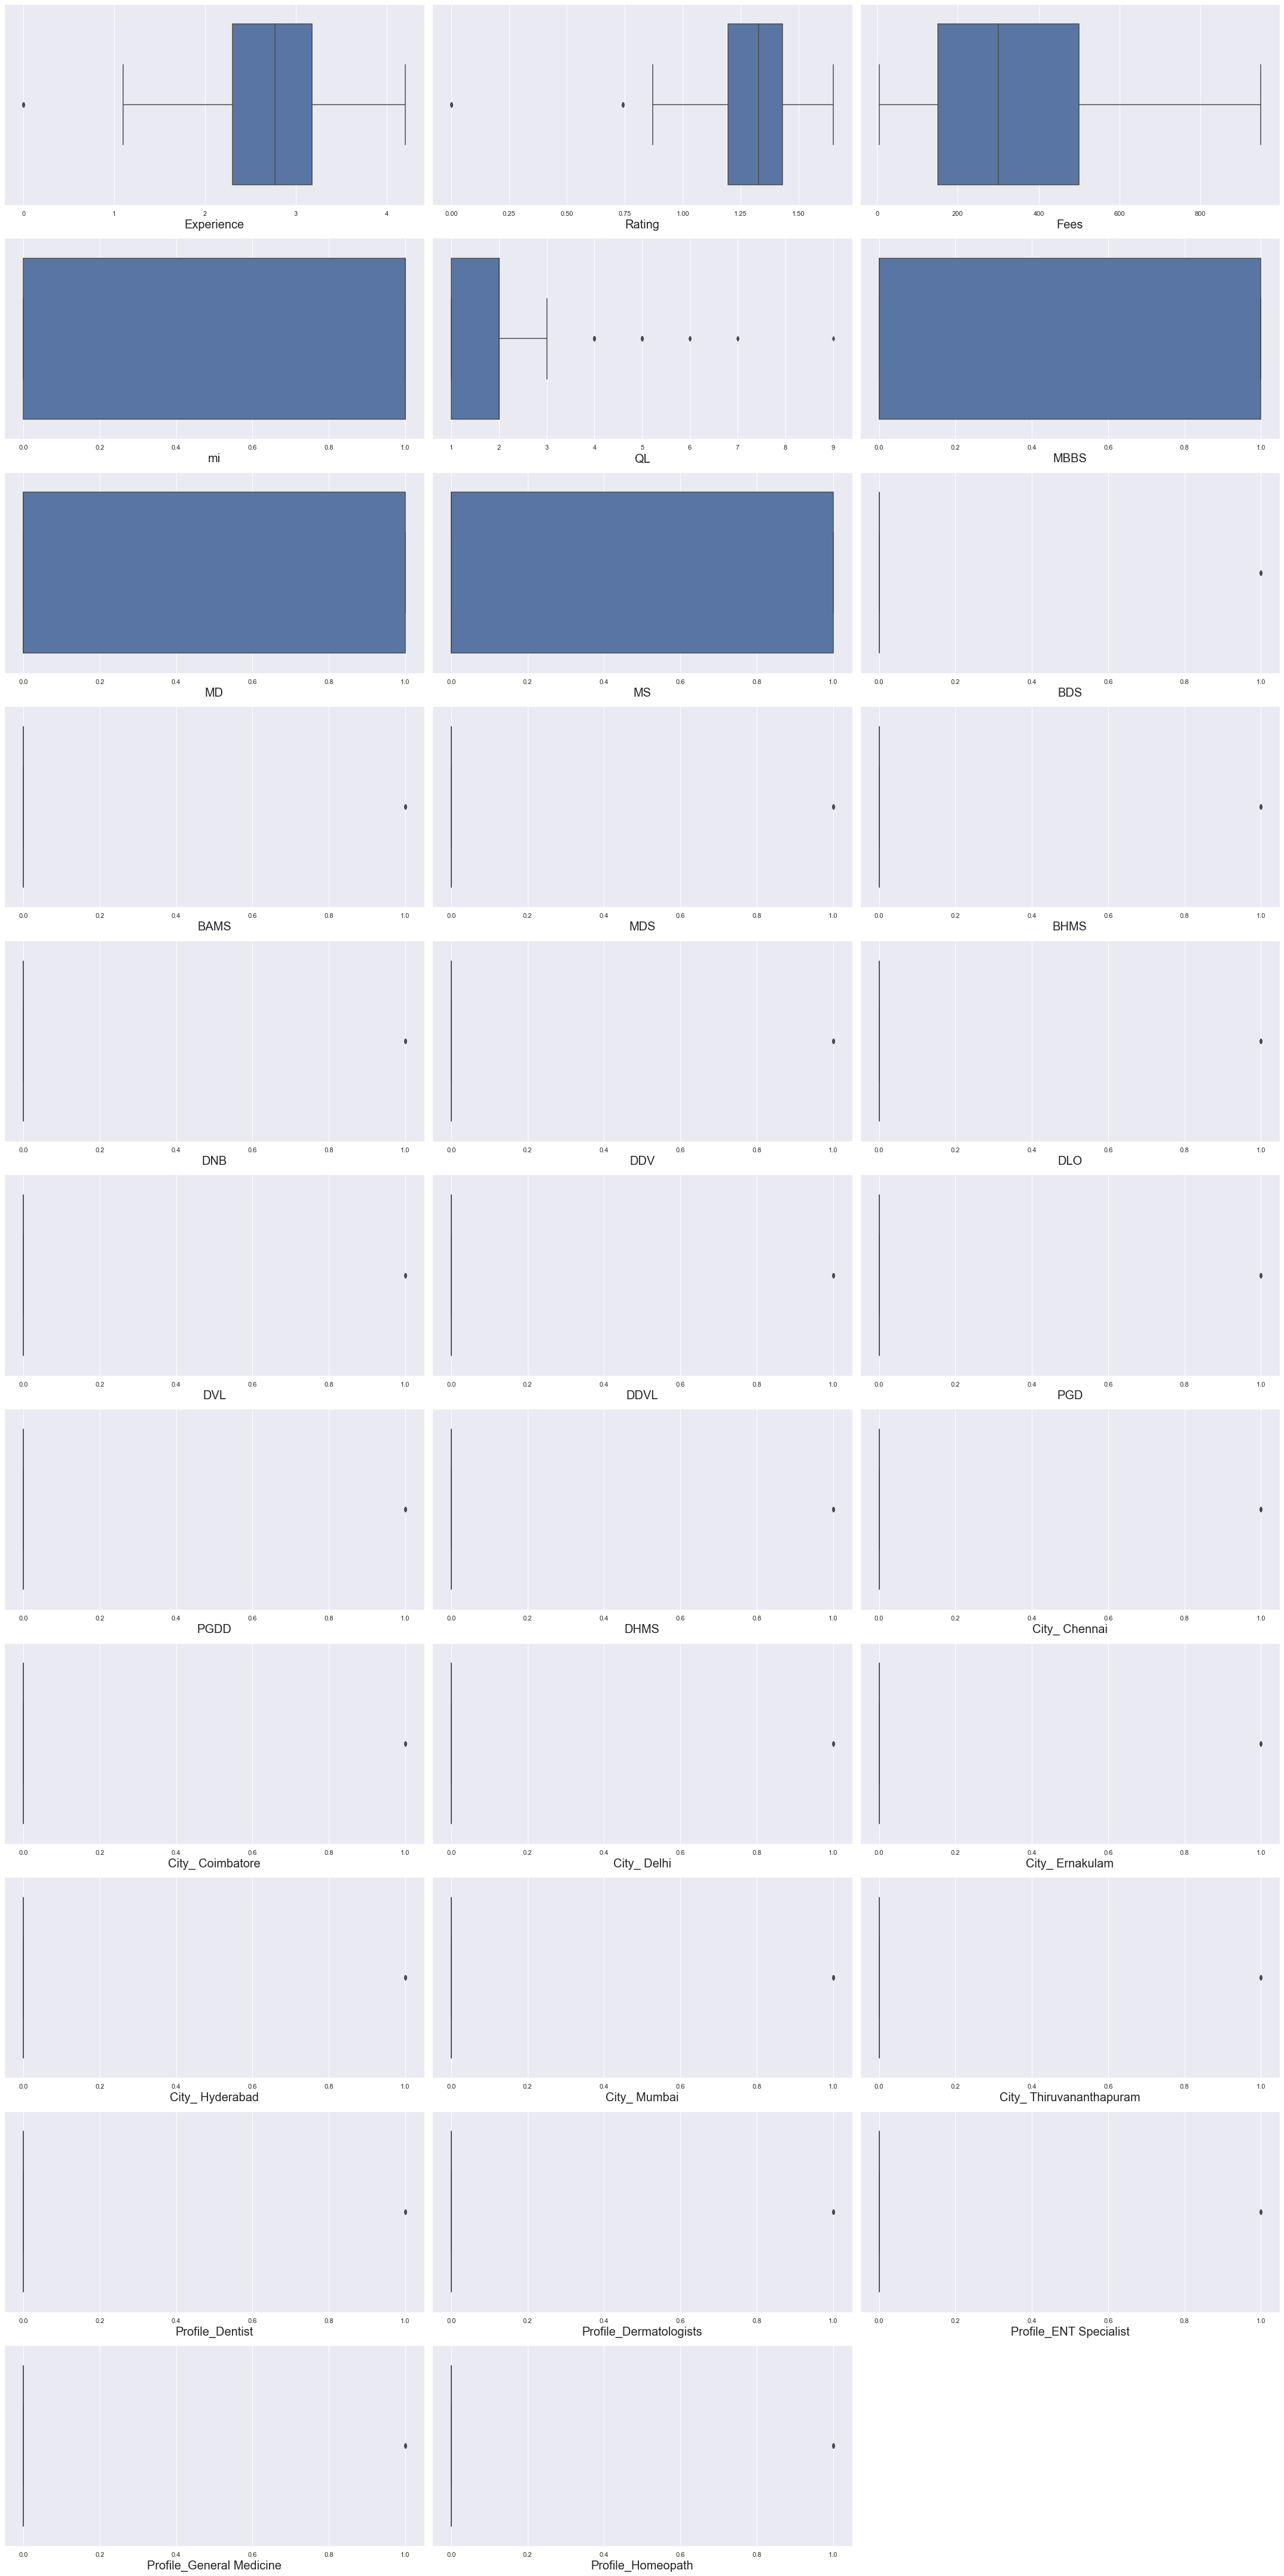

In [84]:
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1
for column in df_final:
    ax = plt.subplot(11,3,plotnumber)
    sns.boxplot(x = column, data = df_final )
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

In [85]:
from scipy.stats import zscore
z_score=np.abs(zscore(df_final))
df_final= df_final[(z_score<3).all(axis=1)]

In [86]:
df_final.shape

(4404, 32)

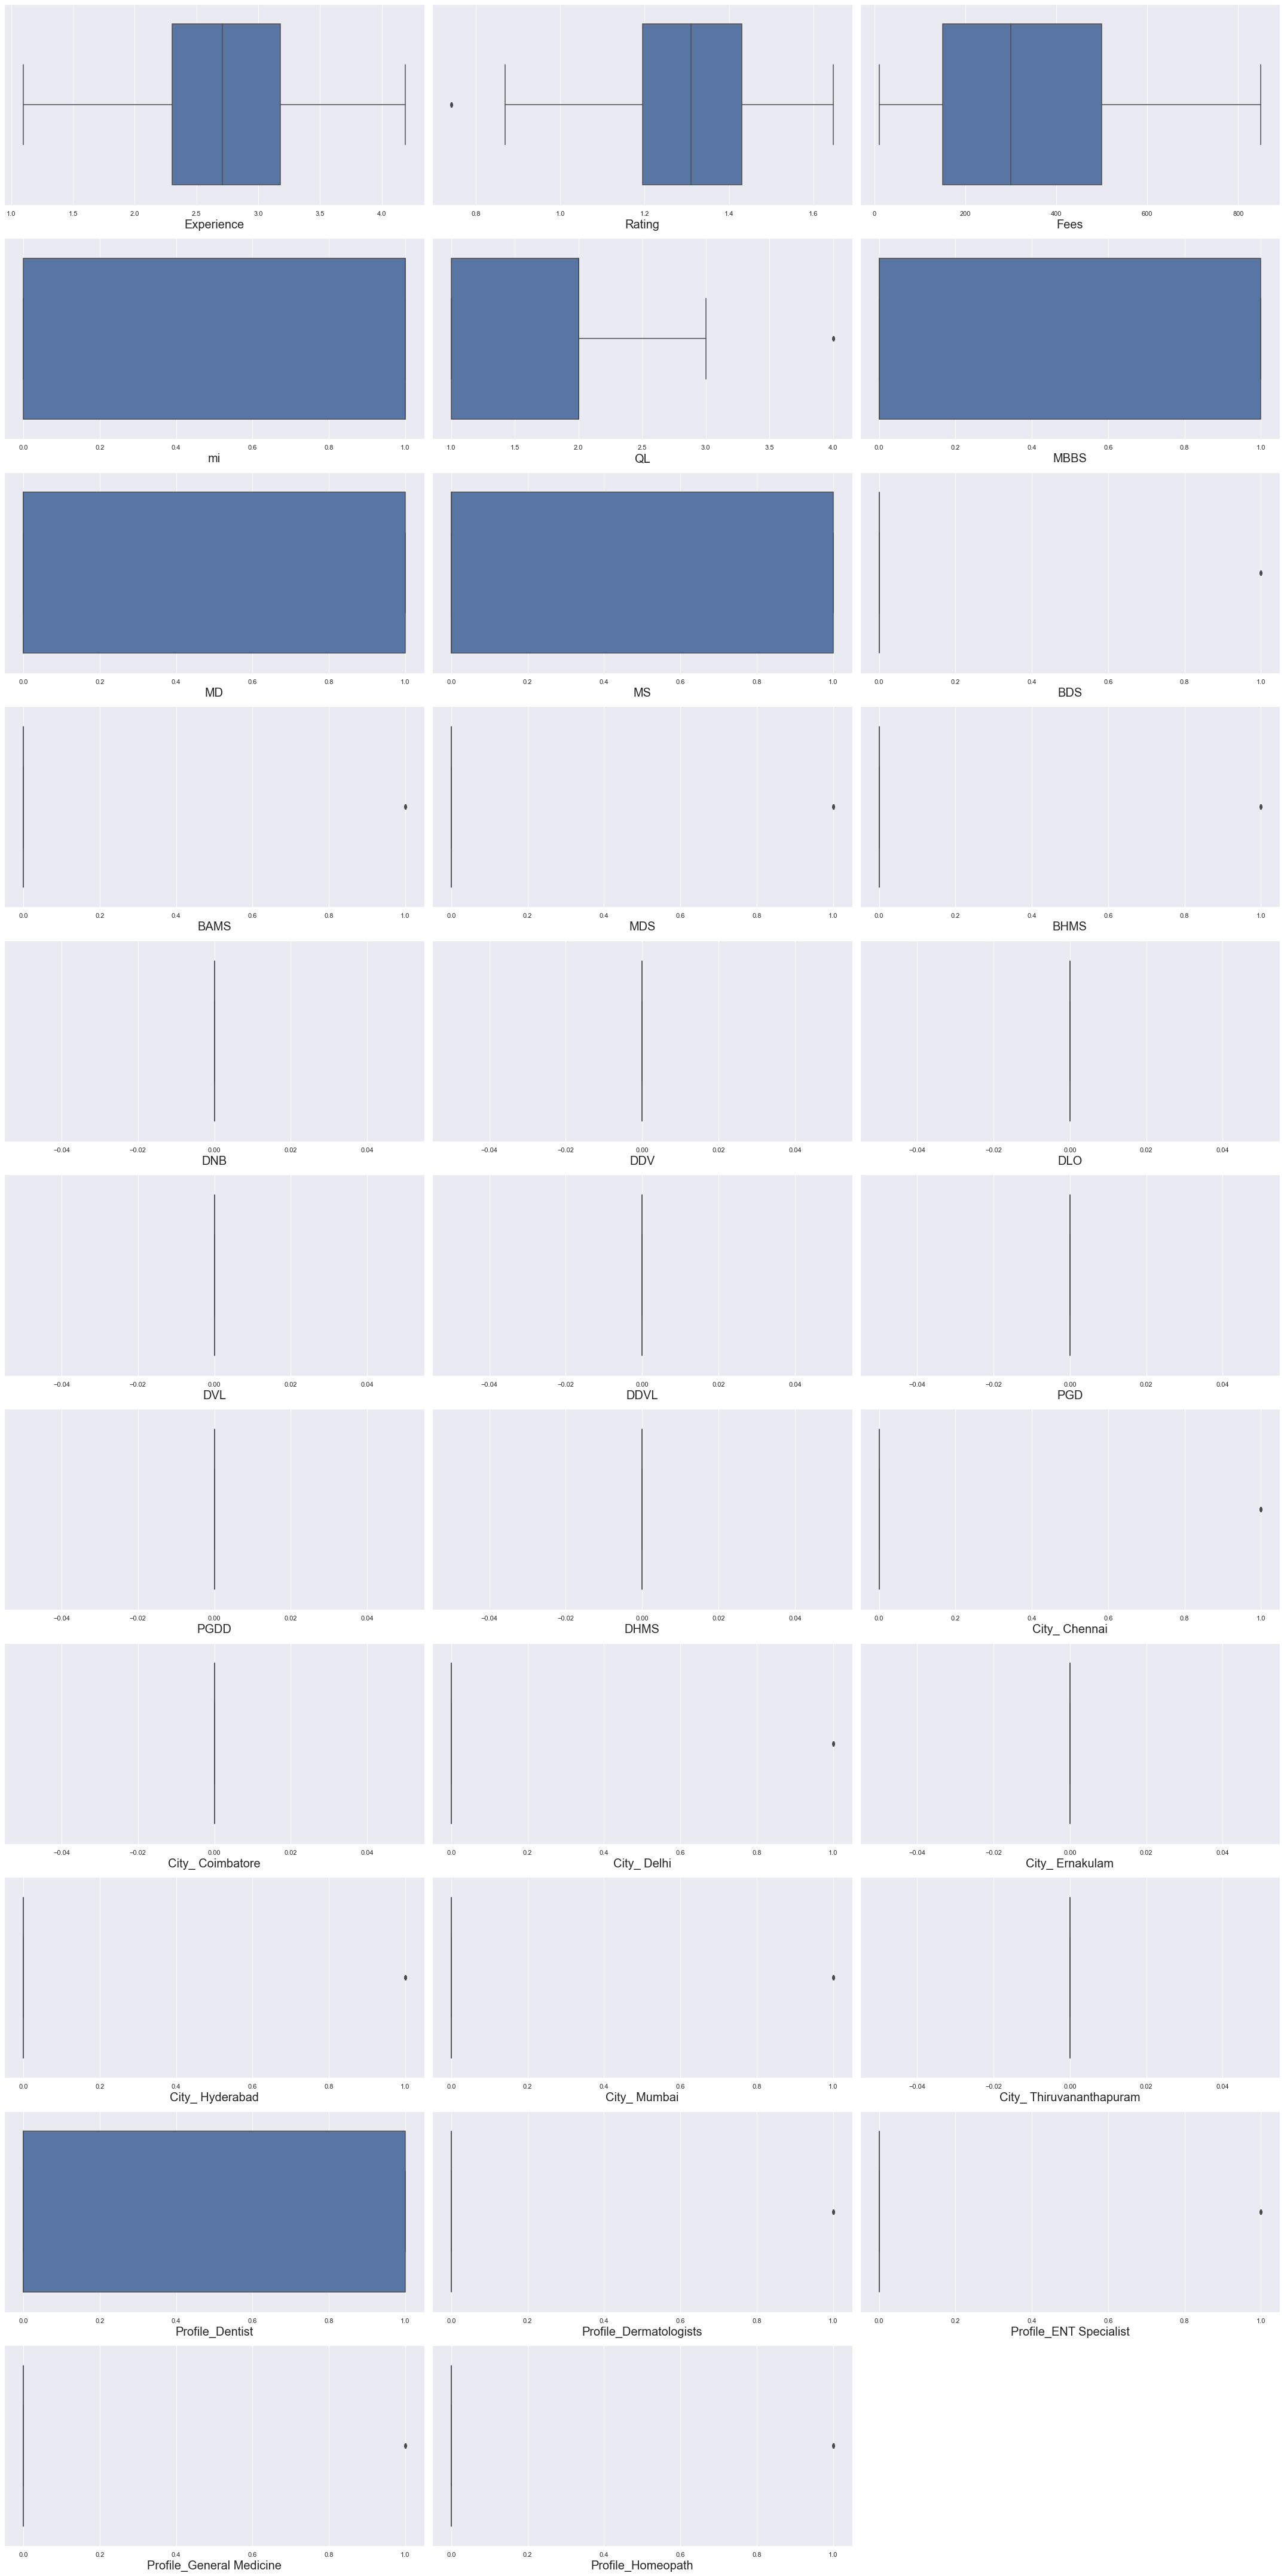

In [87]:
plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1
for column in df_final:
    ax = plt.subplot(11,3,plotnumber)
    sns.boxplot(x = column, data = df_final )
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

<AxesSubplot:>

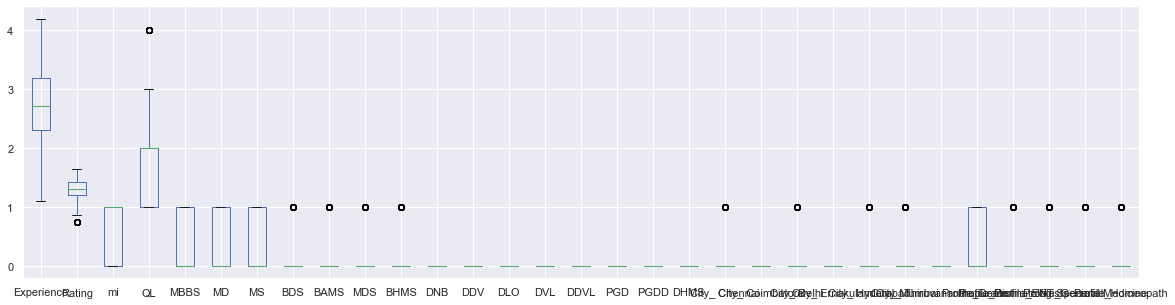

In [88]:
df_final.drop('Fees', axis = 1).plot(kind='box', figsize = (20,5))

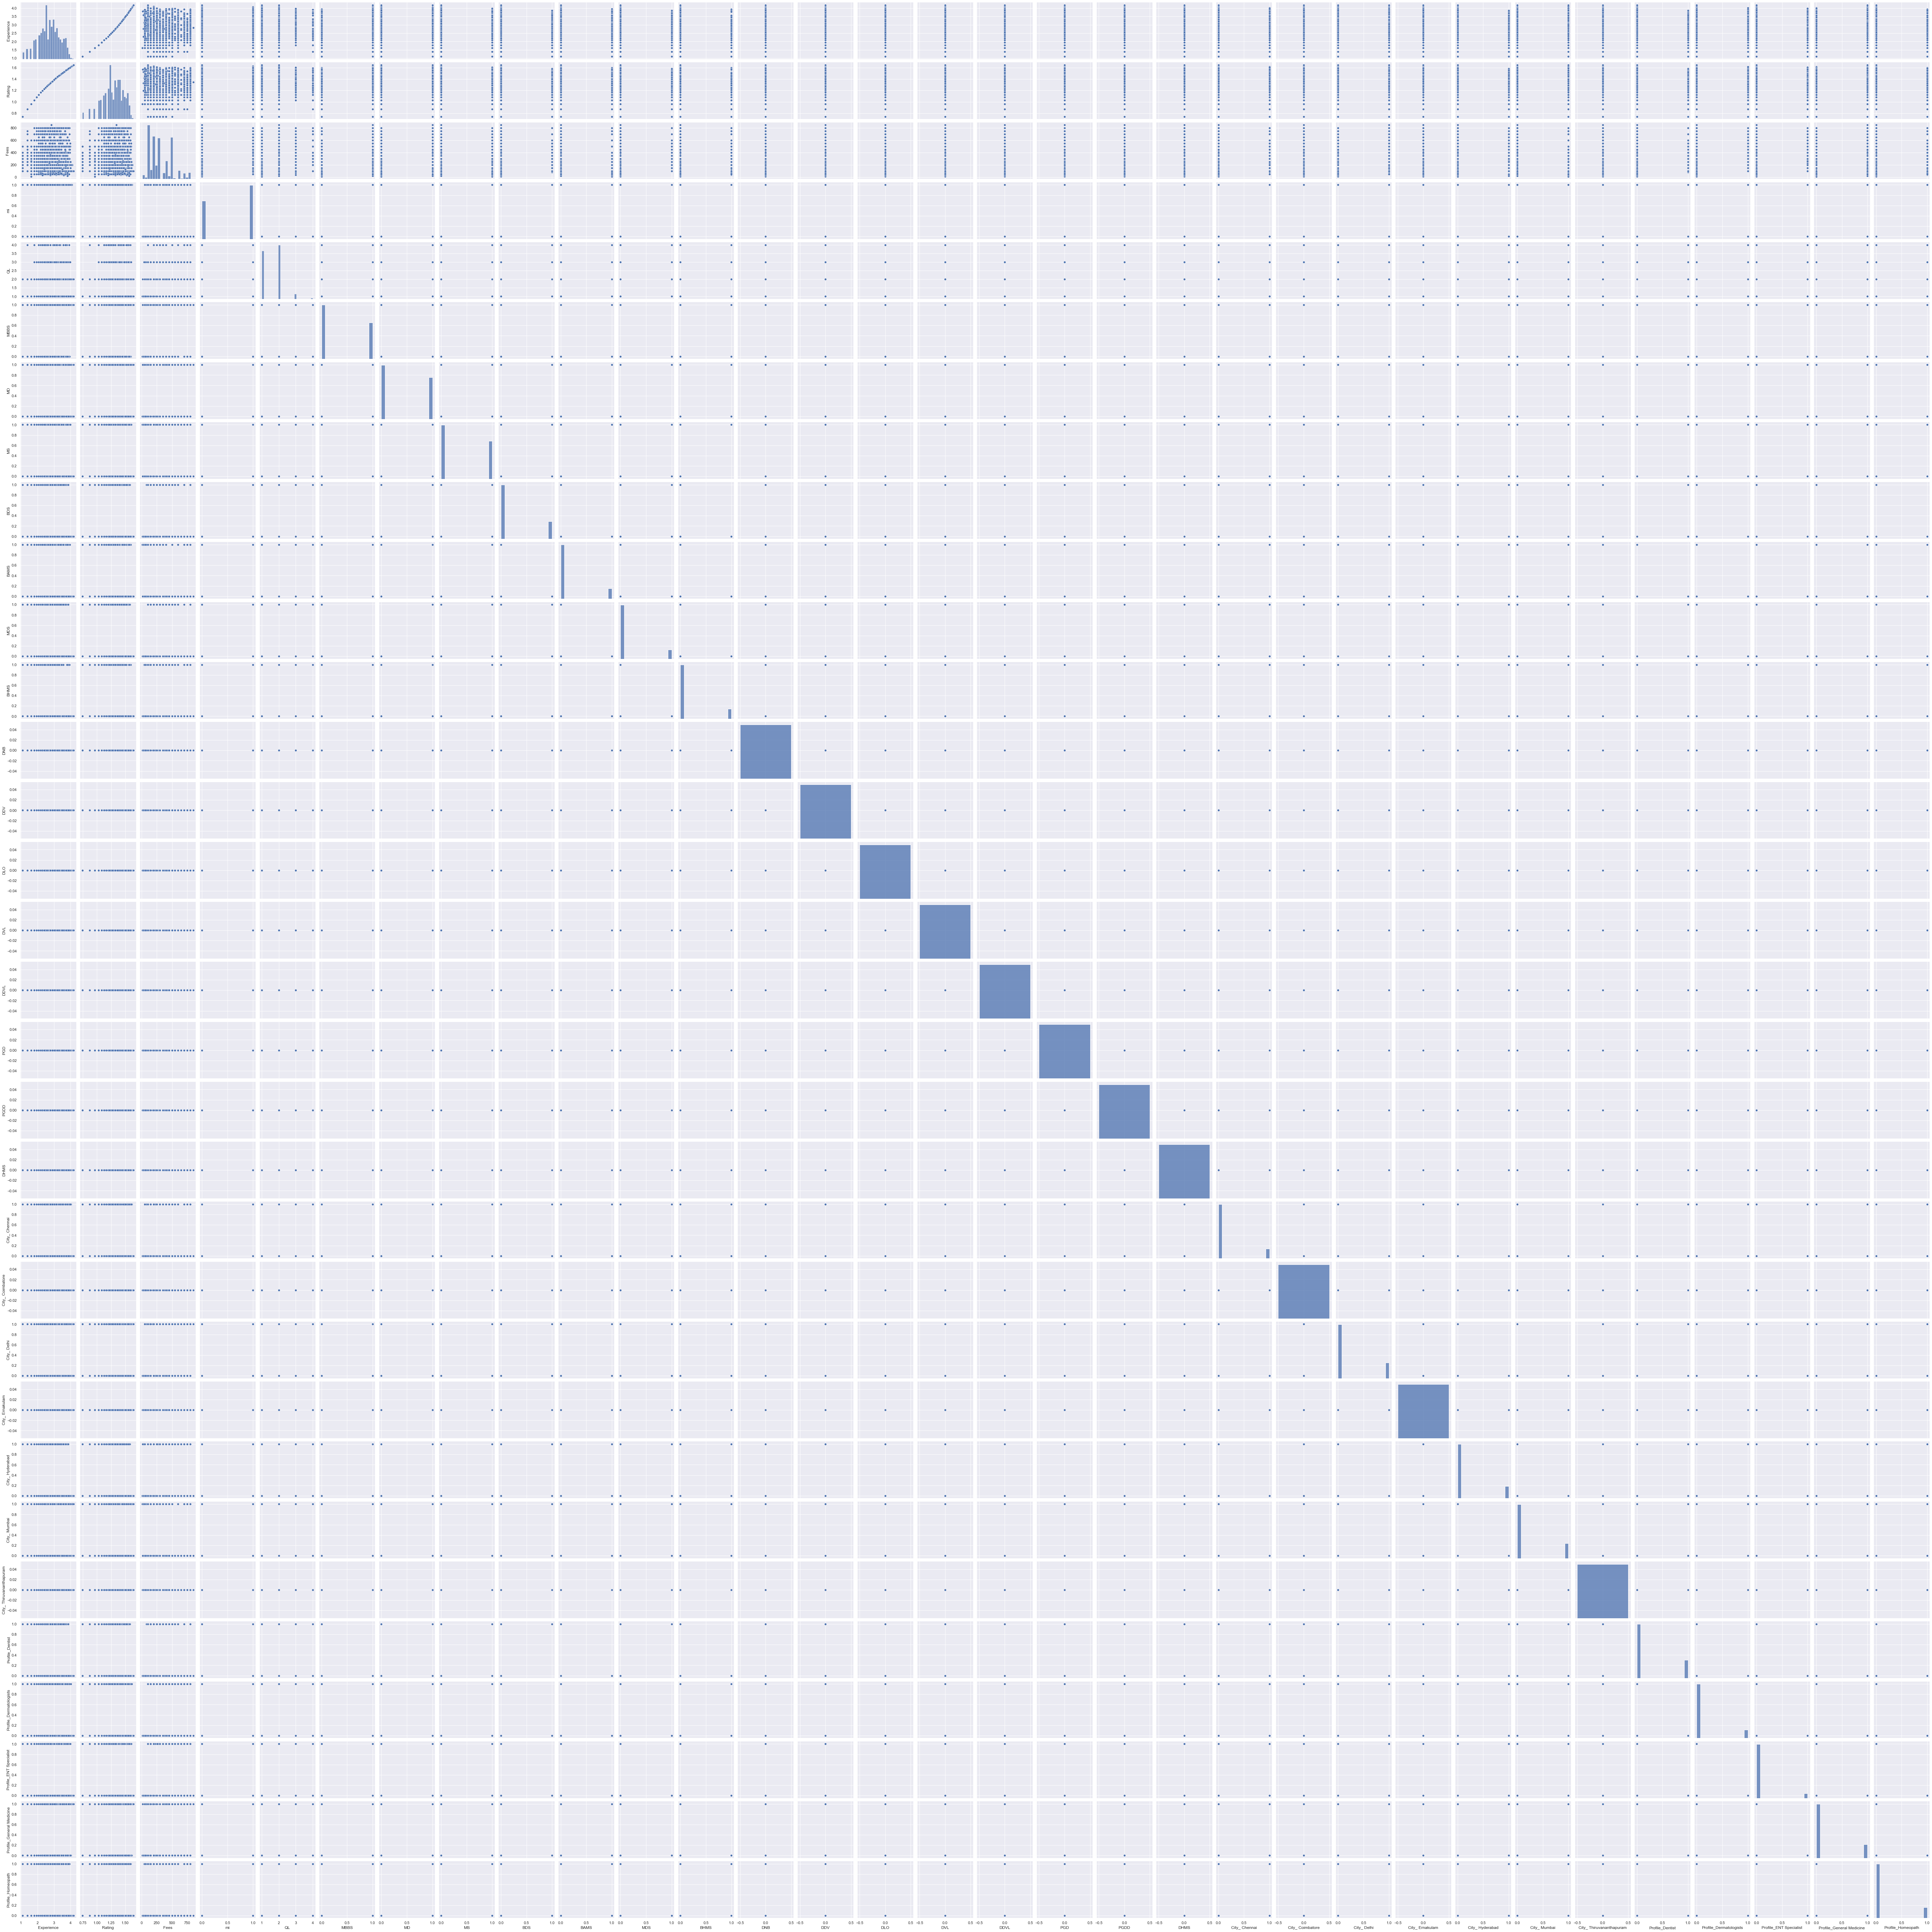

In [89]:
sns.pairplot(df_final)

In [90]:
#Splitting data
x= df_final.drop('Fees', axis = 1)
y = df_final['Fees']

In [91]:
#using min max scaler on x
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mms = mm.fit_transform(x)

In [92]:
x = pd.DataFrame(mms, columns = x.columns)

In [93]:
x.head()

Experience    Rating   mi        QL  MBBS   MD   MS  BDS  BAMS  MDS  ...  \
0    0.474383  0.585243  1.0  0.333333   0.0  1.0  1.0  0.0   1.0  0.0  ...   
1    0.389504  0.500810  0.0  0.333333   1.0  0.0  1.0  0.0   0.0  0.0  ...   
2    0.474383  0.585243  1.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   
3    0.629532  0.724645  1.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   
4    0.355418  0.465000  0.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   

   City_ Delhi  City_ Ernakulam  City_ Hyderabad  City_ Mumbai  \
0          0.0              0.0              0.0           0.0   
1          0.0              0.0              0.0           0.0   
2          0.0              0.0              0.0           0.0   
3          0.0              0.0              0.0           0.0   
4          0.0              0.0              0.0           0.0   

   City_ Thiruvananthapuram  Profile_Dentist  Profile_Dermatologists  \
0                       0.0              0.0                     0.0   
1                       0.0              0.0                     0.0   
2                       0.0              0.0                     0.0   
3                       0.0              0.0                     0.0   
4                       0.0              0.0                     0.0   

   Profile_ENT Specialist  Profile_General Medicine  Profile_Homeopath  
0                     0.0                       0.0                0.0  
1                     1.0                       0.0                0.0  
2                     0.0                       0.0                0.0  
3                     0.0                       0.0                0.0  
4                     0.0                       0.0                0.0  

[5 rows x 31 columns]

In [94]:
y.head()

1    350
2    300
3    250
4    250
5    100
Name: Fees, dtype: int64

In [95]:
x.skew()

Experience                 -0.206324
Rating                     -0.668719
mi                         -0.345766
QL                          0.695759
MBBS                        0.401247
MD                          0.263937
MS                          0.359083
BDS                         1.181905
BAMS                        1.840904
MDS                         2.031752
BHMS                        1.901539
DNB                         0.000000
DDV                         0.000000
DLO                         0.000000
DVL                         0.000000
DDVL                        0.000000
PGD                         0.000000
PGDD                        0.000000
DHMS                        0.000000
City_ Chennai               1.947657
City_ Coimbatore            0.000000
City_ Delhi                 1.320521
City_ Ernakulam             0.000000
City_ Hyderabad             1.636158
City_ Mumbai                1.377912
City_ Thiruvananthapuram    0.000000
Profile_Dentist             1.146724
P

# Model Creation and Prediction

In [96]:
models =[LinearRegression(), Lasso(), Ridge(), ElasticNet(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(),GradientBoostingRegressor() ]

for m in models:
    mse = 4000
    for r in range(100):    
        x_train ,x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state = r)
        m.fit(x_train, y_train)
        y_pred = m.predict(x_test)
        mae =mean_absolute_error(y_test,y_pred)
        r2 = r2_score(y_test,y_pred)
        if mae < mse:
            mse = mae
            r_state = r
            rs = r2
            
    print(f"The least mean squared error of model {m} is {mse} at random state {r_state}") 
    print(f"The r2score {m} is {rs} ") 
    print()

The least mean squared error of model LinearRegression() is 129.33572834485446 at random state 9
The r2score LinearRegression() is 0.18891875424118443 

The least mean squared error of model Lasso() is 130.1350378680423 at random state 9
The r2score Lasso() is 0.1882273167533297 

The least mean squared error of model Ridge() is 128.805271915474 at random state 9
The r2score Ridge() is 0.19225244751969517 

The least mean squared error of model ElasticNet() is 139.74004338933702 at random state 73
The r2score ElasticNet() is 0.07226169398908355 

The least mean squared error of model SVR() is 131.94031436197656 at random state 12
The r2score SVR() is 0.12419897094580501 

The least mean squared error of model DecisionTreeRegressor() is 153.23350867193088 at random state 31
The r2score DecisionTreeRegressor() is -0.2952911301182566 

The least mean squared error of model KNeighborsRegressor() is 133.4483541430193 at random state 61
The r2score KNeighborsRegressor() is 0.0885564387658448

In [97]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel='poly'),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
x_train ,x_test, y_train, y_test= train_test_split(x, y, test_size=.2)
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m,"is :",m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("r2 score is:",r2_score(y_test,pred))
    print("mean absolute error is:",mean_absolute_error(y_test,pred))
    print("mean squared error is:",mean_squared_error(y_test,pred))
    print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")
    print("                                                                  ")

score of  LinearRegression() is : 0.16892263765135151
r2 score is: 0.11816650255583283
mean absolute error is: 137.66715244400035
mean squared error is: 30298.658484445914
Root mean squared error is: 174.06509840989352


                                                                  
score of  DecisionTreeRegressor() is : 0.7138736274554444
r2 score is: -0.3988951310951947
mean absolute error is: 161.0155319204695
mean squared error is: 48064.227493570645
Root mean squared error is: 219.23555253099494


                                                                  
score of  KNeighborsRegressor() is : 0.34393461363070155
r2 score is: 0.0590919819464939
mean absolute error is: 140.45970488081724
mean squared error is: 32328.38261066969
Root mean squared error is: 179.80095275239697


                                                                  
score of  SVR(kernel='poly') is : 0.12406553784484997
r2 score is: 0.0911989337978627
mean absolute error is: 136.26579823942149
mea

In [98]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("score of ",m,"is:",score)
    print("mean score",score.mean())
    print("standard deviation",score.std())
    print('')

score of  LinearRegression() is: [0.16425802 0.14041495 0.16886712 0.15613294 0.10473987]
mean score 0.1468825811546606
standard deviation 0.02318893478255013

score of  DecisionTreeRegressor() is: [-0.43191335 -0.34447942 -0.42897858 -0.31619269 -0.55661187]
mean score -0.41563518175321645
standard deviation 0.08398738470584967

score of  KNeighborsRegressor() is: [ 0.01536929  0.0064263   0.06735915  0.04355637 -0.02749893]
mean score 0.021042436277392794
standard deviation 0.0324166508732776

score of  SVR() is: [0.10617324 0.06074613 0.09917726 0.04106901 0.09563103]
mean score 0.08055933261463535
standard deviation 0.02522658677168602

score of  Lasso() is: [0.16524397 0.13280429 0.16299275 0.15322278 0.10709796]
mean score 0.14427235228700225
standard deviation 0.02183494355509912

score of  Ridge() is: [0.16619009 0.13812656 0.16783056 0.15580829 0.10368931]
mean score 0.1463289620996471
standard deviation 0.02379940953661328

score of  ElasticNet() is: [0.09488417 0.0795948  0.

In [99]:
gb = GradientBoostingRegressor()

param = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10] }

gsv= GridSearchCV(estimator = gb,param_grid = param, scoring= 'r2', n_jobs=-1,cv = 10)
gsv.fit(x_train,y_train)
gsv.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [100]:
y_pred = gsv.predict(x_test)

In [101]:
pred = gsv.predict(x_train)

<AxesSubplot:xlabel='Fees', ylabel='Density'>

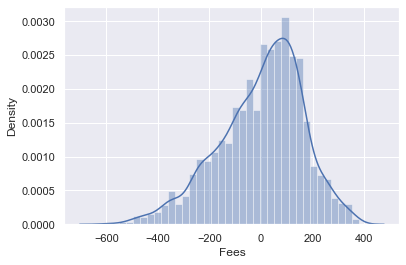

In [102]:
sns.distplot(pred-y_train) #Training Data distribution

<AxesSubplot:xlabel='Fees', ylabel='Density'>

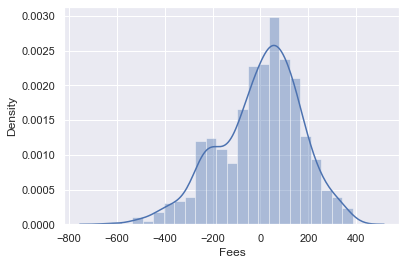

In [103]:
sns.distplot(y_pred-y_test) #testing data distribution

<AxesSubplot:ylabel='Fees'>

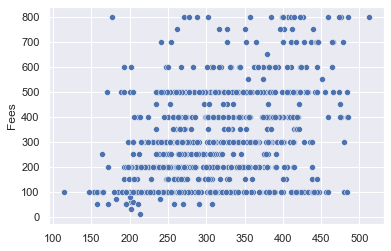

In [104]:
sns.scatterplot(y_pred,y_test)

In [105]:
r2_score(y_pred, y_test)

-4.234521020351042

In [106]:
gb = GradientBoostingRegressor(learning_rate= 0.03, max_depth = 4, n_estimators= 100, subsample=0.5)
x_train ,x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state =58)
gb.fit(x_train, y_train)

y_pred=gb.predict(x_test)
print("r2 score is:",r2_score(y_test,y_pred))
print("mean absolute error is:",mean_absolute_error(y_test,y_pred))
print("mean squared error is:",mean_squared_error(y_test,y_pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,y_pred)))
  

r2 score is: 0.19184534400887143
mean absolute error is: 128.24743914812913
mean squared error is: 25860.6743177783
Root mean squared error is: 160.81254403117407


<AxesSubplot:xlabel='Fees', ylabel='Density'>

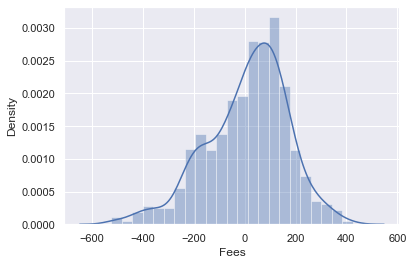

In [107]:
sns.distplot(y_pred-y_test)

<AxesSubplot:ylabel='Fees'>

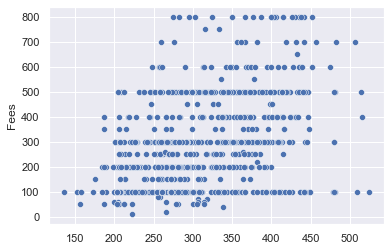

In [108]:
sns.scatterplot(y_pred, y_test)

### Gradient Boosting Regressor is the best model

In [109]:
#Saving the model
import joblib
joblib.dump(gb,'gb.doctors.pkl')

['gb.doctors.pkl']

In [110]:
x.head()

Experience    Rating   mi        QL  MBBS   MD   MS  BDS  BAMS  MDS  ...  \
0    0.474383  0.585243  1.0  0.333333   0.0  1.0  1.0  0.0   1.0  0.0  ...   
1    0.389504  0.500810  0.0  0.333333   1.0  0.0  1.0  0.0   0.0  0.0  ...   
2    0.474383  0.585243  1.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   
3    0.629532  0.724645  1.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   
4    0.355418  0.465000  0.0  0.000000   0.0  0.0  1.0  0.0   1.0  0.0  ...   

   City_ Delhi  City_ Ernakulam  City_ Hyderabad  City_ Mumbai  \
0          0.0              0.0              0.0           0.0   
1          0.0              0.0              0.0           0.0   
2          0.0              0.0              0.0           0.0   
3          0.0              0.0              0.0           0.0   
4          0.0              0.0              0.0           0.0   

   City_ Thiruvananthapuram  Profile_Dentist  Profile_Dermatologists  \
0                       0.0              0.0                     0.0   
1                       0.0              0.0                     0.0   
2                       0.0              0.0                     0.0   
3                       0.0              0.0                     0.0   
4                       0.0              0.0                     0.0   

   Profile_ENT Specialist  Profile_General Medicine  Profile_Homeopath  
0                     0.0                       0.0                0.0  
1                     1.0                       0.0                0.0  
2                     0.0                       0.0                0.0  
3                     0.0                       0.0                0.0  
4                     0.0                       0.0                0.0  

[5 rows x 31 columns]

In [111]:
xbest = pd.DataFrame(gb.feature_importances_, index =x.columns , columns = ['importance'])

In [112]:
#Reducing features 
xbest

importance
Experience                  0.149529
Rating                      0.127357
mi                          0.064394
QL                          0.140484
MBBS                        0.142438
MD                          0.023179
MS                          0.016230
BDS                         0.017497
BAMS                        0.014976
MDS                         0.004009
BHMS                        0.018758
DNB                         0.000000
DDV                         0.000000
DLO                         0.000000
DVL                         0.000000
DDVL                        0.000000
PGD                         0.000000
PGDD                        0.000000
DHMS                        0.000000
City_ Chennai               0.019580
City_ Coimbatore            0.000000
City_ Delhi                 0.071636
City_ Ernakulam             0.000000
City_ Hyderabad             0.005287
City_ Mumbai                0.046620
City_ Thiruvananthapuram    0.000000
Profile_Dentist             0.014895
Profile_Dermatologists      0.034920
Profile_ENT Specialist      0.040425
Profile_General Medicine    0.025017
Profile_Homeopath           0.022768

In [113]:
xbest.sort_values(by = 'importance', ascending = False)[:-11] #best features (Removing last 11 features)

importance
Experience                  0.149529
MBBS                        0.142438
QL                          0.140484
Rating                      0.127357
City_ Delhi                 0.071636
mi                          0.064394
City_ Mumbai                0.046620
Profile_ENT Specialist      0.040425
Profile_Dermatologists      0.034920
Profile_General Medicine    0.025017
MD                          0.023179
Profile_Homeopath           0.022768
City_ Chennai               0.019580
BHMS                        0.018758
BDS                         0.017497
MS                          0.016230
BAMS                        0.014976
Profile_Dentist             0.014895
City_ Hyderabad             0.005287
MDS                         0.004009

In [114]:
feat = xbest.sort_values(by = 'importance', ascending = False)[:-11].index

In [115]:
t = x[feat]

In [116]:
#remaking the model with feature sekection
gb1 = GradientBoostingRegressor(learning_rate= 0.03, max_depth = 4, n_estimators= 100, subsample=0.5)
t_train ,t_test, y_train, y_test= train_test_split(t, y, test_size=.2, random_state =58)
gb1.fit(t_train, y_train)

y_pred=gb1.predict(t_test)
print("r2 score is:",r2_score(y_test,y_pred))
print("mean absolute error is:",mean_absolute_error(y_test,y_pred))
print("mean squared error is:",mean_squared_error(y_test,y_pred))
print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.1968290164537594
mean absolute error is: 127.80253385462476
mean squared error is: 25701.1984933822
Root mean squared error is: 160.31593337339305


In [117]:
#best random state for least absolute error
mse = 130
for r in range(100):    
    x_train ,x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state = r)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    mae =mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    if mae < mse:
        mse = mae
        r_state = r
        rs = r2
            
print(f"The least absolute error of gradient boost is {mse} at random state {r_state}") 
print(f"The r2score is {rs} ") 

The least absolute error of gradient boost is 128.0156388212619 at random state 9
The r2score is 0.20414620646510606 


In [118]:
#best random state for r2 score
r2s = 0.15
for r in range(100):    
    x_train ,x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state = r)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    mae =mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    if r2 > r2s:
        mse = mae
        r_state = r
        r2s = r2
            
print(f"The least absolute error of gradient boost is {mse} at random state {r_state}") 
print(f"The r2score is {rs} ") 

The least absolute error of gradient boost is 129.89564145484817 at random state 8
The r2score is 0.20414620646510606 


## GB1 is the best model

In [119]:
joblib.dump(gb1,'gb1.doctors_fs.pkl')

['gb1.doctors_fs.pkl']